In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

/panfs/roc/msisoft/anaconda/anaconda3-5.0.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


scikit-allel 1.2.0


## Baseline 107
After all filtering, including removing variants with high missingness.  
Includes sites with more than two alleles.

In [2]:
baseline = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.vcf'

In [ ]:
#allel.vcf_to_hdf5(baseline,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.h5',
                  fields='*',
                  overwrite=True)

## FN 27
After all filtering  
Only biallelic sites

In [3]:
de_novo = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final.vcf'

In [4]:
allel.vcf_to_hdf5(de_novo,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final.h5',
                  fields='*',
                  overwrite=True)

## Indel length distribution

### Baseline

In [4]:
callset = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis.h5', mode='r')

In [5]:
variants = allel.VariantChunkedTable(callset['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [6]:
lengths = np.vectorize(len)
unique, counts = np.unique(lengths(variants['ALT'][:, 0]) - lengths(variants['REF'][:]), return_counts=True)

In [7]:
non_indel_index = np.where(np.logical_and(unique > -1, unique < 1))[0][0]
non_indel_num = counts[non_indel_index]

In [8]:
counts = counts/(len(variants['REF'][:]) - non_indel_num)

In [9]:
len_range = 20
ins_start = np.where(np.logical_and(unique > 0, unique < len_range+1))[0][0]
ins_end = np.where(np.logical_and(unique > 0, unique < len_range+1))[0][-1]
del_start = np.where(np.logical_and(unique < 0, unique > -1*len_range-1))[0][0]
del_end = np.where(np.logical_and(unique < 0, unique > -1*len_range-1))[0][-1]

### De novo

In [10]:
callset_dn = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final.h5', mode='r')

In [11]:
variants_dn = allel.VariantChunkedTable(callset_dn['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [12]:
lengths = np.vectorize(len)
unique_dn, counts_dn = np.unique(lengths(variants_dn['ALT'][:, 0]) - lengths(variants_dn['REF'][:]), return_counts=True)

In [13]:
non_indel_index_dn = np.where(np.logical_and(unique_dn > -1, unique_dn < 1))[0][0]
non_indel_num_dn = counts_dn[non_indel_index_dn]

In [14]:
counts_dn = counts_dn/(len(variants_dn['REF'][:]) - non_indel_num_dn)

In [15]:
len_range_dn = 20
ins_start_dn = np.where(np.logical_and(unique_dn > 0, unique_dn < len_range_dn+1))[0][0]
ins_end_dn = np.where(np.logical_and(unique_dn > 0, unique_dn < len_range_dn+1))[0][-1]
del_start_dn = np.where(np.logical_and(unique_dn < 0, unique_dn > -1*len_range_dn-1))[0][0]
del_end_dn = np.where(np.logical_and(unique_dn < 0, unique_dn > -1*len_range_dn-1))[0][-1]

#### Number of variants per line

In [16]:
callset_vpl = allel.read_vcf(de_novo)
gt_vpl = allel.GenotypeArray(callset_vpl['calldata/GT'])
index_vpl = gt_vpl.n_samples
samps_vpl = callset_vpl['samples']

In [17]:
generations = np.array([7, 7, 7, 7, 8, 8, 8, 8, 6, 3, 5, 5, 4, 4, 6, 5, 5, 5, 4, 5, 5, 5, 5, 4, 6, 5, 6])

In [18]:
stats_vpl = np.ndarray(shape=(27,2), dtype=np.int32)
for i in range(0, index_vpl):
        stats_vpl.itemset((i, 0), i+1)
        stats_vpl.itemset((i, 1), gt_vpl[:,i].count_hom_alt())

In [19]:
np.std(stats_vpl[:,1])

34.01371465506948

In [20]:
np.mean(stats_vpl[:,1])

85.25925925925925

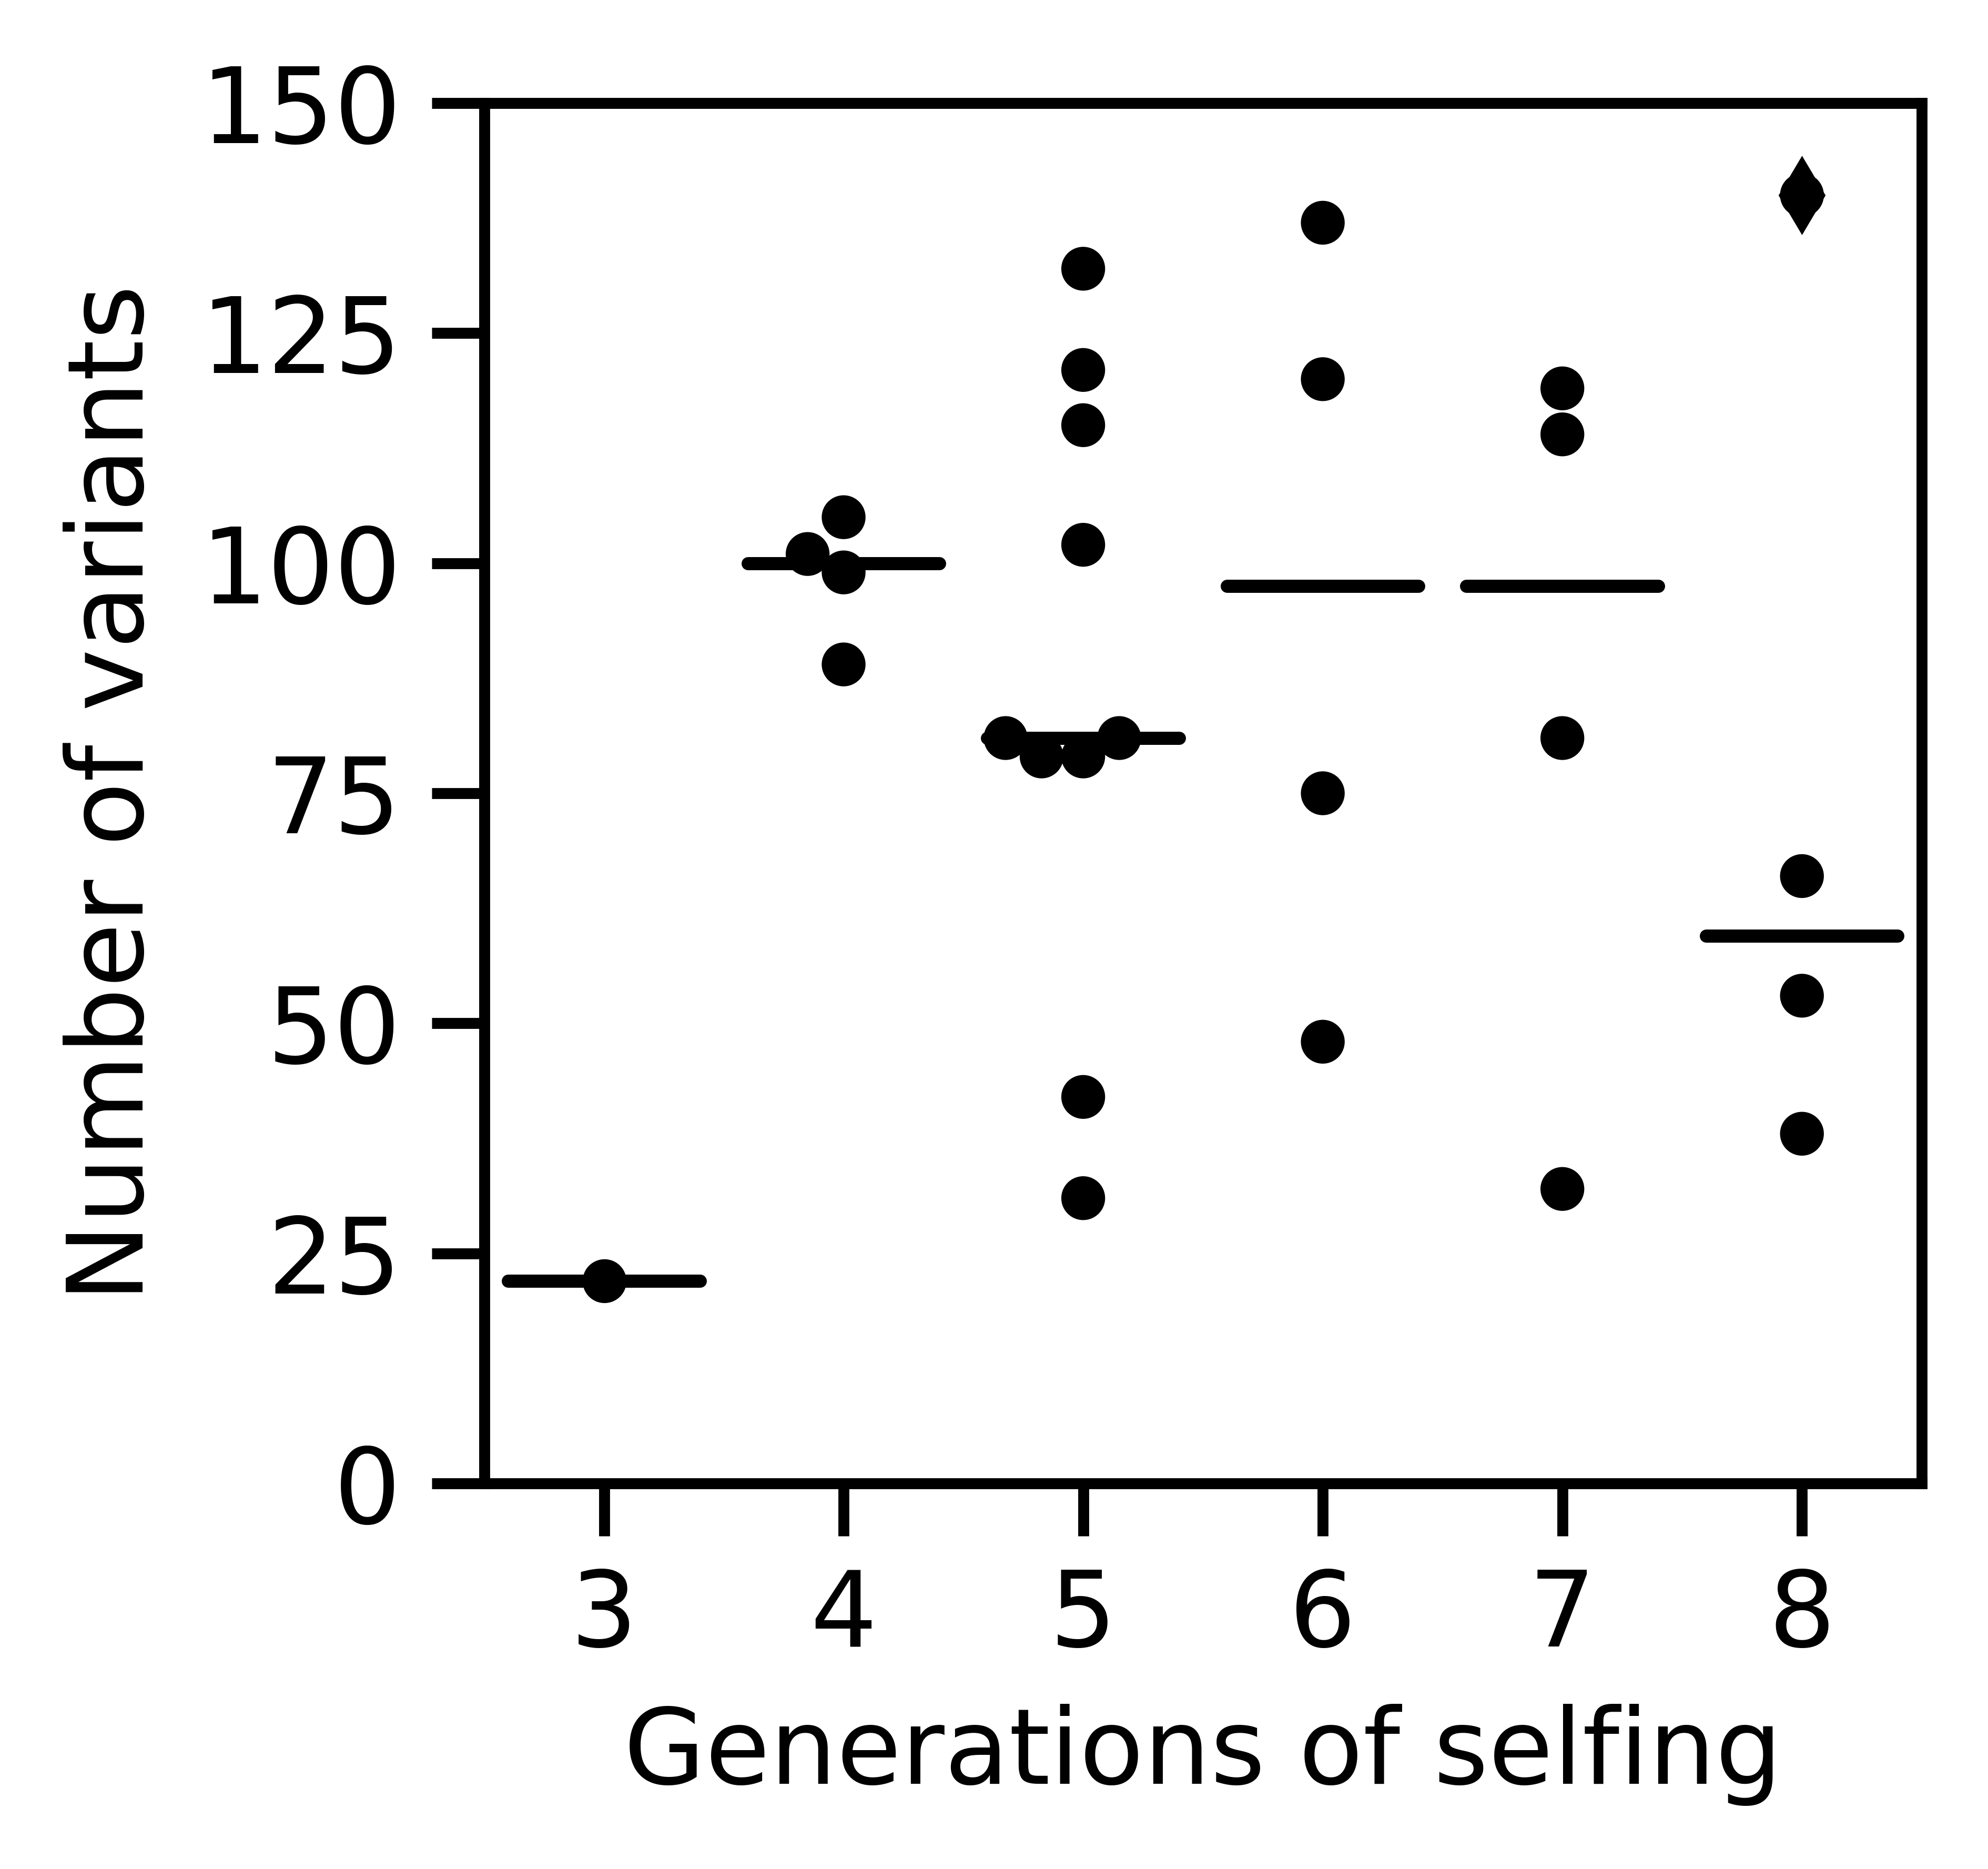

In [21]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
ax = sns.swarmplot(generations, stats_vpl[:,1], color='black')
ax = sns.boxplot(generations, stats_vpl[:,1], color='black',
        showcaps=False,boxprops={'facecolor':'None', 'linewidth':'0'},
        showfliers=True,whiskerprops={'linewidth':0})
ax.set_ylabel('Number of variants');
ax.set_xlabel('Generations of selfing');
ax.set_ylim(0, 150)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('variants_vs_generations.pdf')

#### Number of indels per line

In [22]:
de_novo_indels = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_indels.vcf'
callset_ipl = allel.read_vcf(de_novo_indels)
gt_ipl = allel.GenotypeArray(callset_ipl['calldata/GT'])
index_ipl = gt_ipl.n_samples
samps_ipl = callset_ipl['samples']
stats_ipl = np.ndarray(shape=(27,2), dtype=np.int32)
for i in range(0, index_ipl):
        stats_ipl.itemset((i, 0), i+1)
        stats_ipl.itemset((i, 1), gt_ipl[:,i].count_hom_alt())
np.std(stats_ipl[:,1])

11.904051713090324

In [23]:
np.mean(stats_ipl[:,1])

32.18518518518518

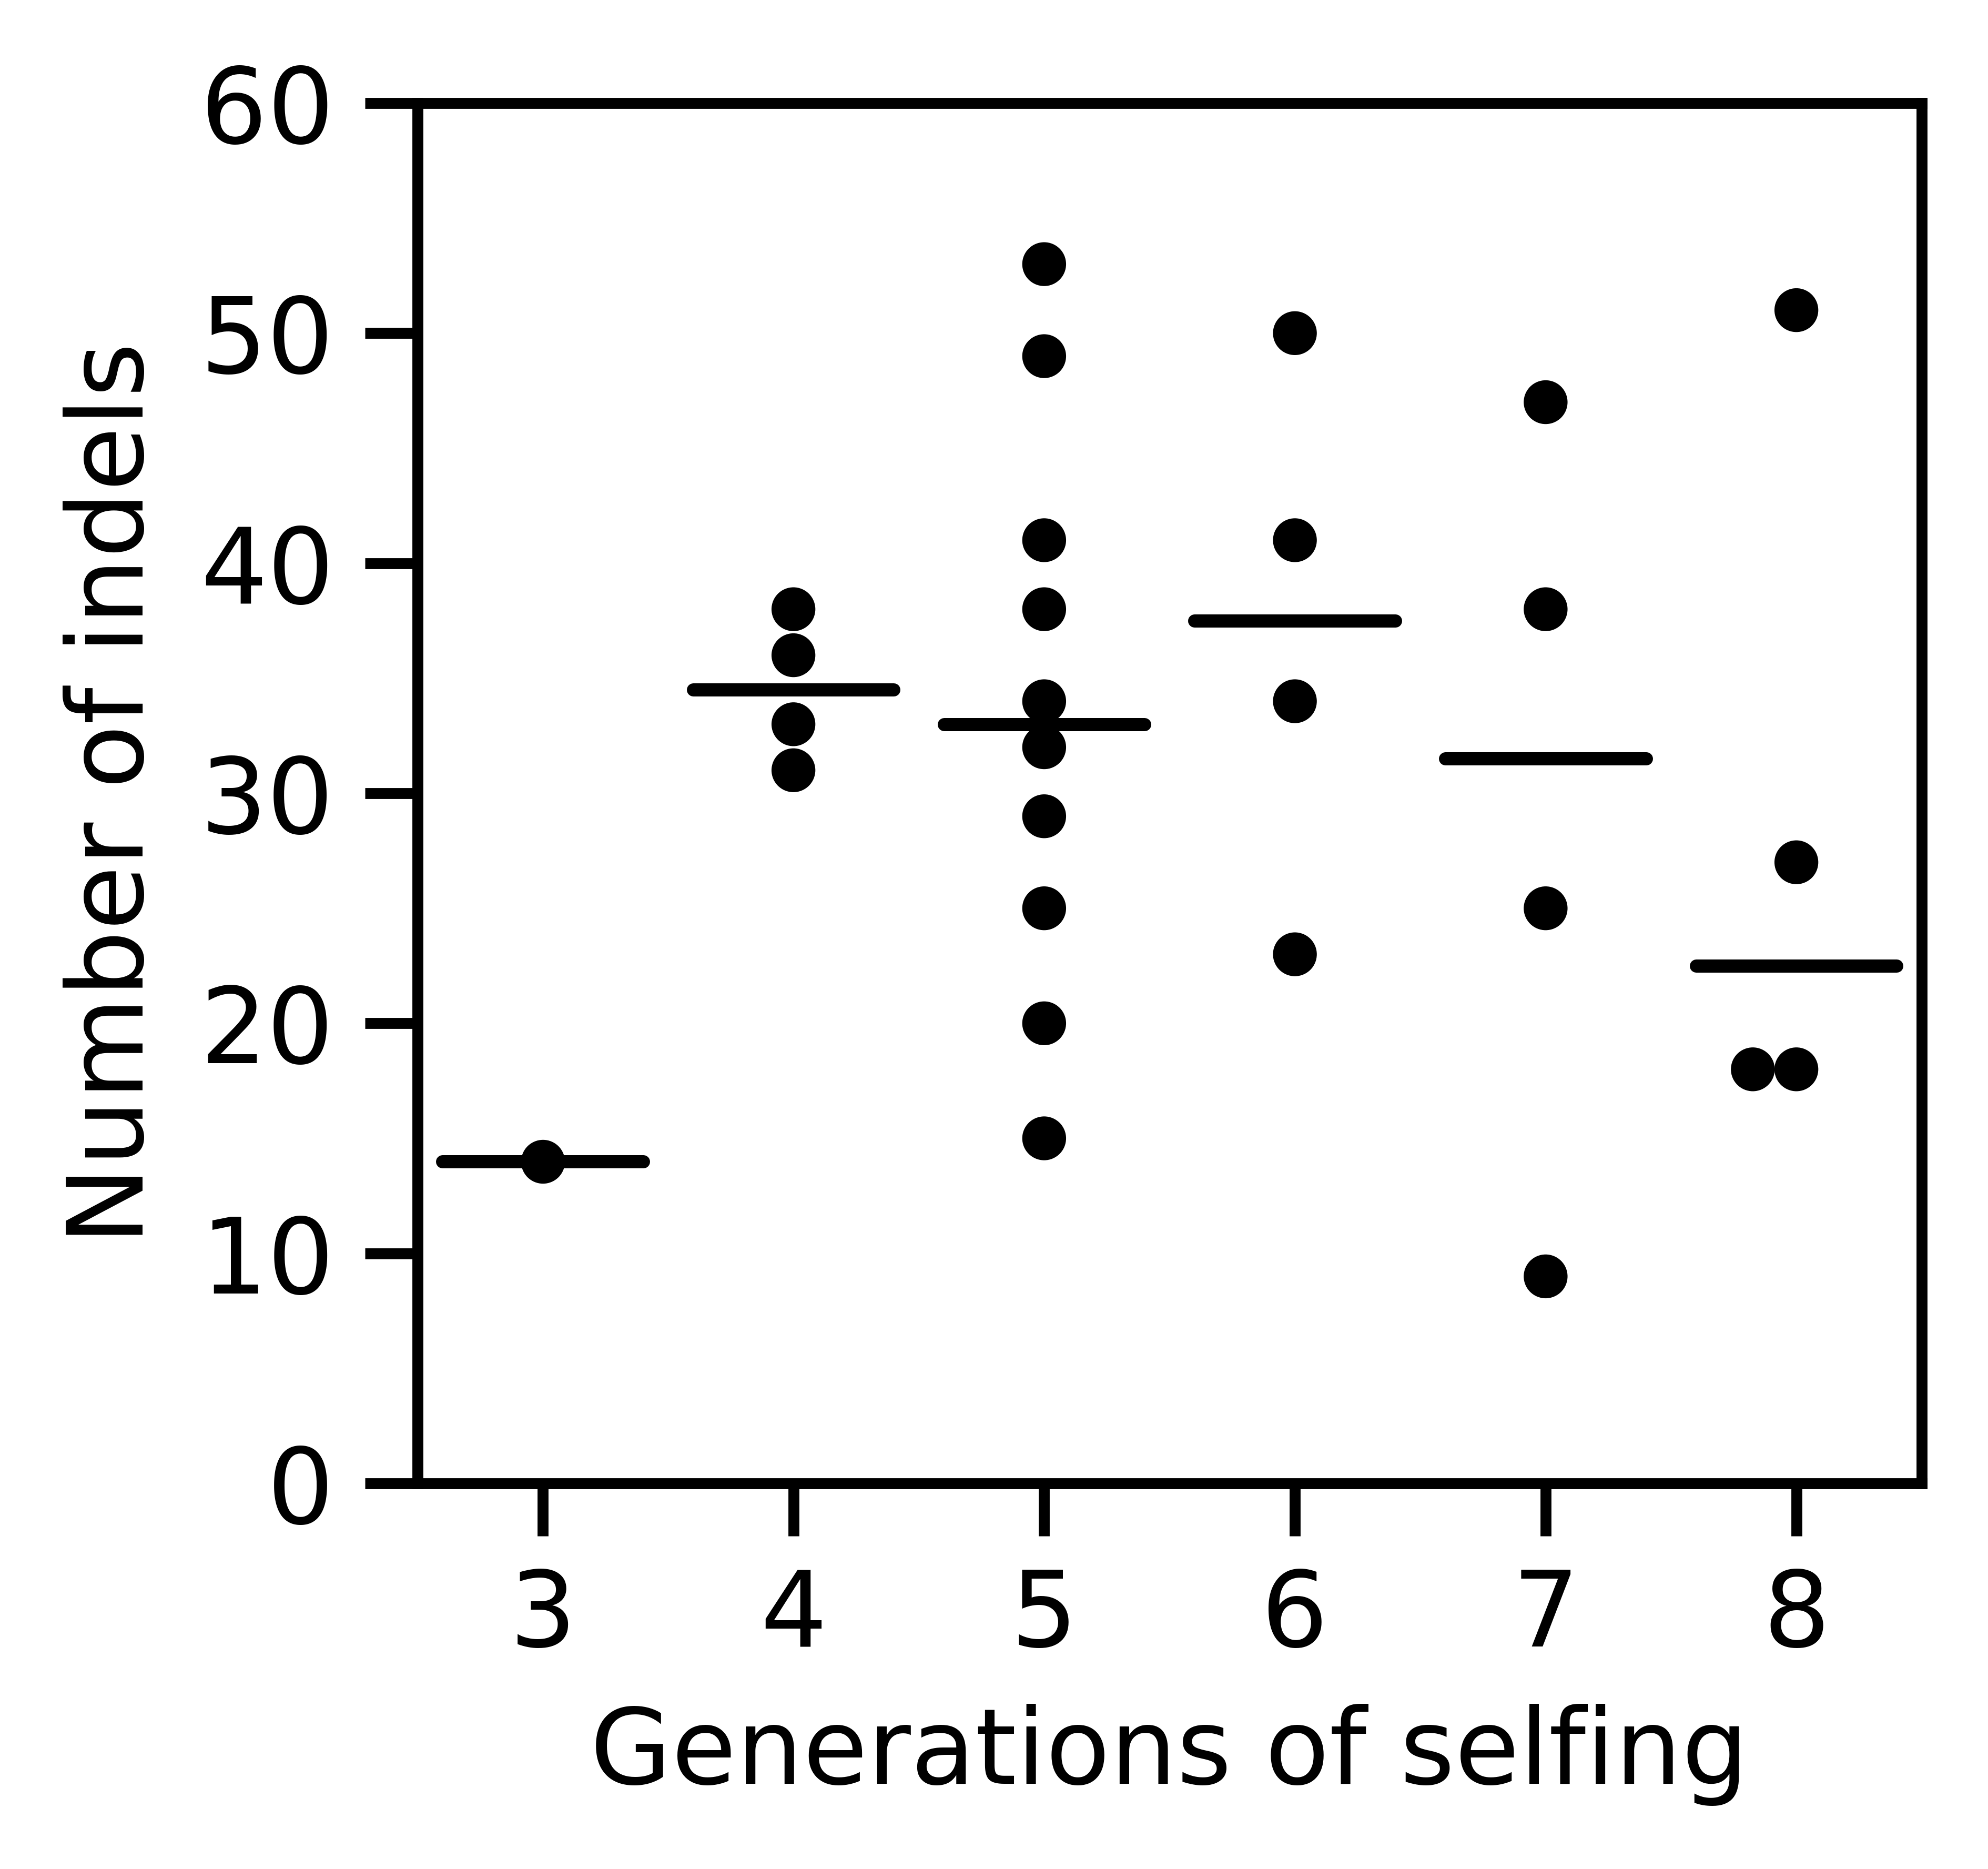

In [24]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
ax = sns.swarmplot(generations, stats_ipl[:,1], color='black')
ax = sns.boxplot(generations, stats_ipl[:,1], color='black',
        showcaps=False,boxprops={'facecolor':'None', 'linewidth':'0'},
        showfliers=True,whiskerprops={'linewidth':0})
ax.set_ylabel('Number of indels');
ax.set_xlabel('Generations of selfing');
ax.set_ylim(0, 60)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('indels_vs_generations.pdf')

#### Number of SNPs per line

In [25]:
de_novo_snps = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_snps.vcf'
callset_spl = allel.read_vcf(de_novo_snps)
gt_spl = allel.GenotypeArray(callset_spl['calldata/GT'])
index_spl = gt_spl.n_samples
samps_spl = callset_spl['samples']
stats_spl = np.ndarray(shape=(27,2), dtype=np.int32)
for i in range(0, index_spl):
        stats_spl.itemset((i, 0), i+1)
        stats_spl.itemset((i, 1), gt_spl[:,i].count_hom_alt())
np.std(stats_spl[:,1])

23.047336032972122

In [26]:
np.mean(stats_spl[:,1])

53.074074074074076

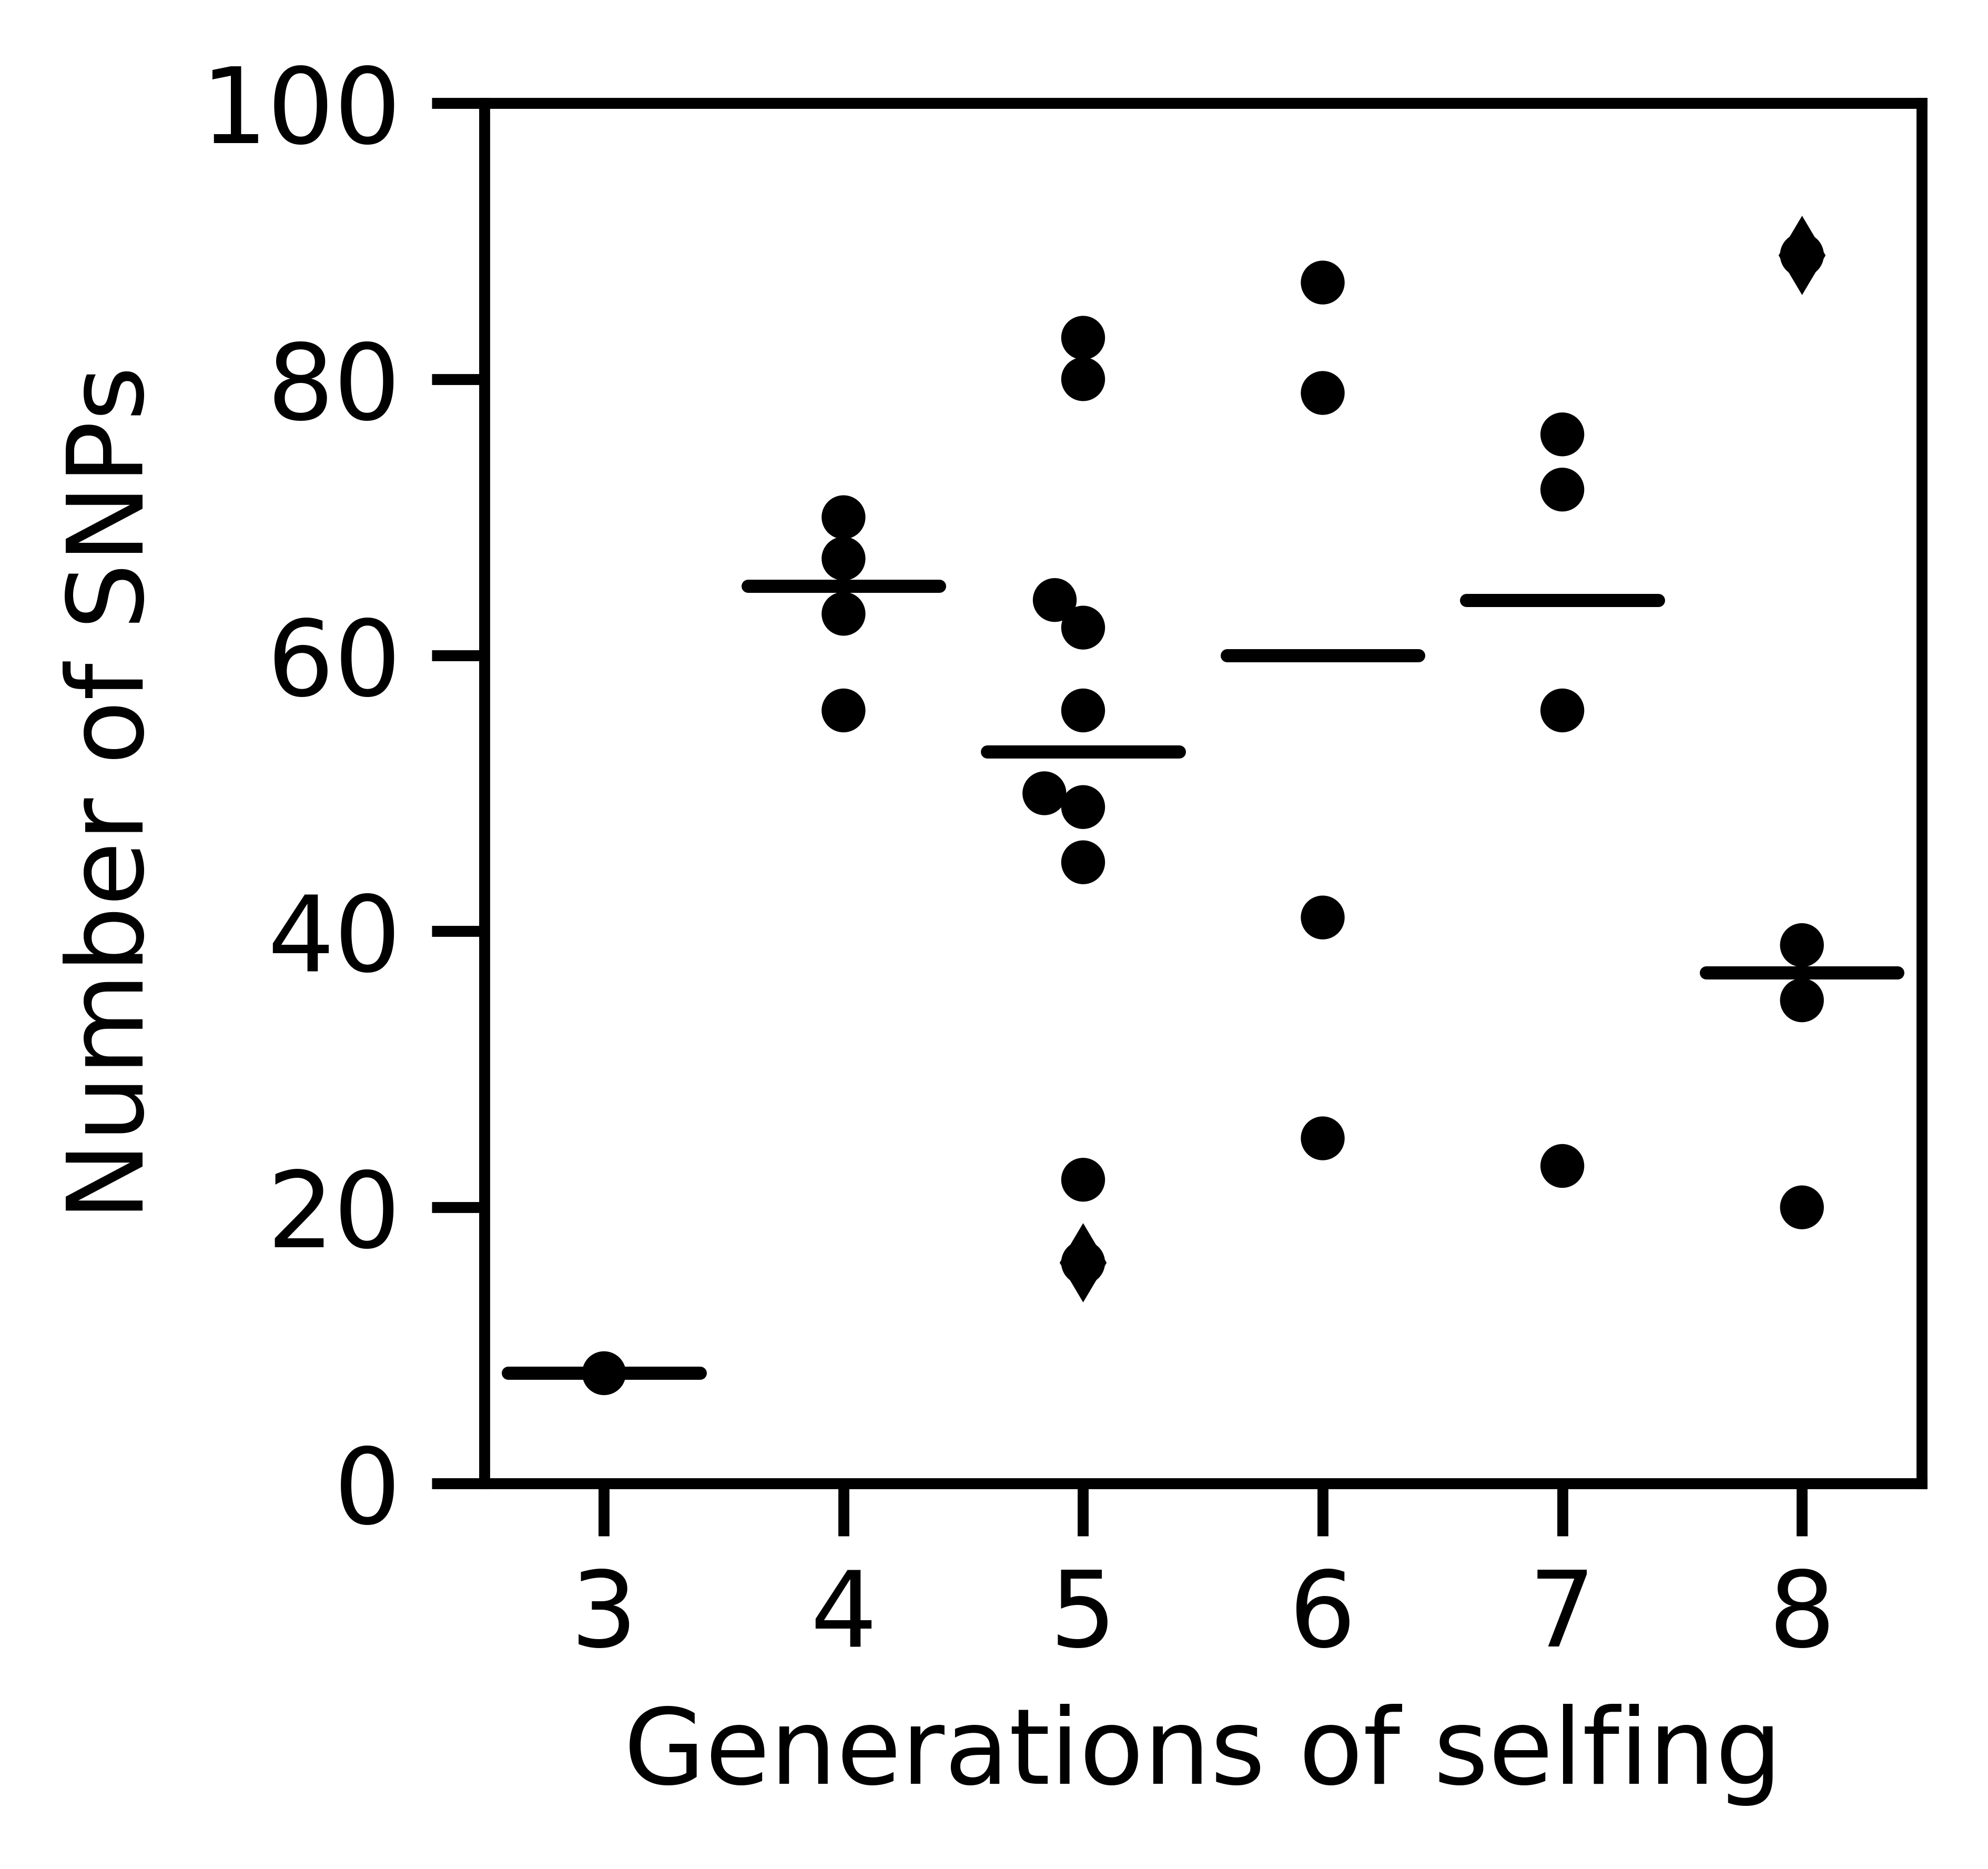

In [27]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
ax = sns.swarmplot(generations, stats_spl[:,1], color='black')
ax = sns.boxplot(generations, stats_spl[:,1], color='black',
        showcaps=False,boxprops={'facecolor':'None', 'linewidth':'0'},
        showfliers=True,whiskerprops={'linewidth':0})
ax.set_ylabel('Number of SNPs');
ax.set_xlabel('Generations of selfing');
ax.set_ylim(0, 100)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('snps_vs_generations.pdf')

#### Small indel length range 

In [28]:
m92 = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/M92-220_final_filtered.vcf'

In [30]:
#allel.vcf_to_hdf5(m92,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/M92-220_final_filtered.h5',
                  fields='*',
                  overwrite=True)

In [31]:
calls = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/M92-220_final_filtered.h5', mode='r')

In [32]:
varsi = allel.VariantChunkedTable(calls['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [33]:
lengths = np.vectorize(len)
unique_si, counts_si = np.unique(lengths(varsi['ALT'][:, 0]) - lengths(varsi['REF'][:]), return_counts=True)

In [34]:
unique_si

array([-256, -234, -215, -202, -201, -200, -199, -196, -193, -192, -191,
       -189, -188, -187, -186, -185, -184, -183, -182, -181, -177, -174,
       -172, -168, -167, -165, -164, -162, -161, -158, -155, -151, -150,
       -149, -147, -145, -144, -143, -142, -141, -140, -139, -138, -137,
       -136, -134, -133, -132, -131, -130, -129, -128, -127, -126, -125,
       -124, -123, -122, -121, -120, -119, -118, -117, -116, -115, -114,
       -113, -112, -111, -110, -109, -108, -107, -106, -105, -104, -103,
       -102, -101, -100,  -99,  -98,  -97,  -96,  -95,  -94,  -93,  -92,
        -91,  -90,  -89,  -88,  -87,  -86,  -85,  -84,  -83,  -82,  -81,
        -80,  -79,  -78,  -77,  -76,  -75,  -74,  -73,  -72,  -71,  -70,
        -69,  -68,  -67,  -66,  -65,  -64,  -63,  -62,  -61,  -60,  -59,
        -58,  -57,  -56,  -55,  -54,  -53,  -52,  -51,  -50,  -49,  -48,
        -47,  -46,  -45,  -44,  -43,  -42,  -41,  -40,  -39,  -38,  -37,
        -36,  -35,  -34,  -33,  -32,  -31,  -30,  -

### Plot

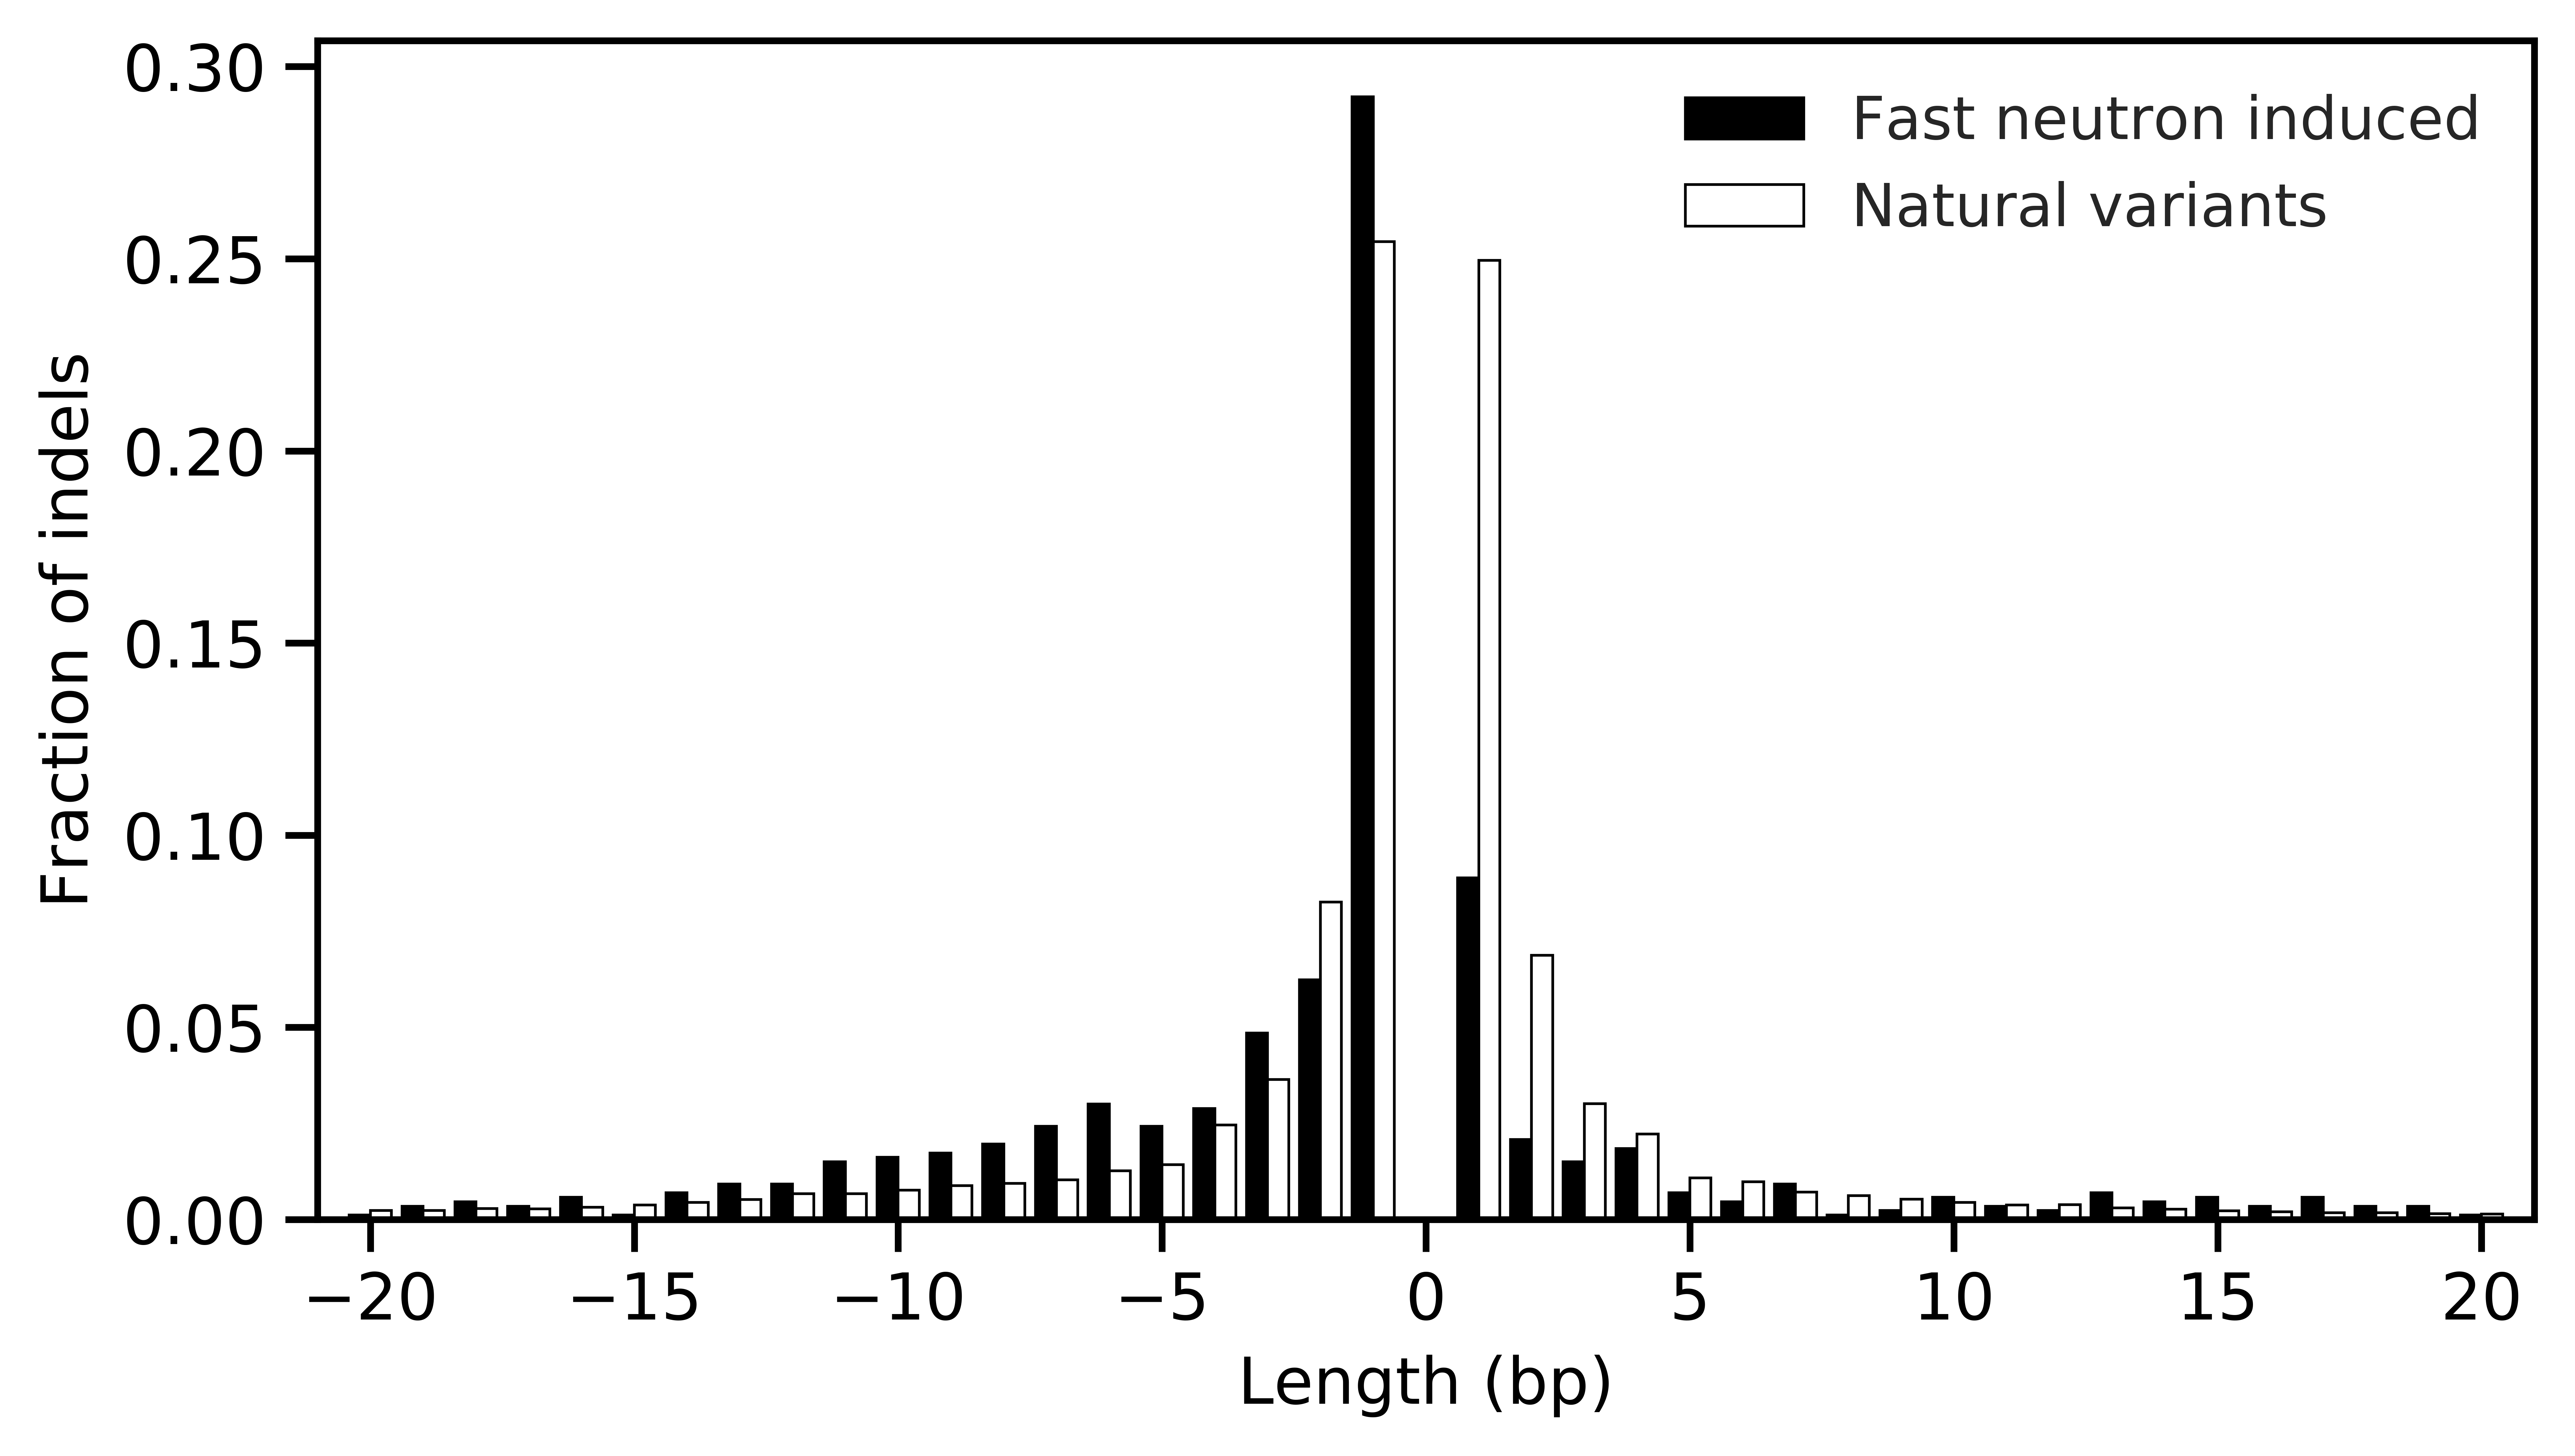

In [35]:
fig, ax = plt.subplots(figsize=(6.75, 4), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(unique_dn[ins_start_dn:ins_end_dn+1]-0.2, counts_dn[ins_start_dn:ins_end_dn+1], width=0.4, color='black', edgecolor='black', linewidth='0.5', label='Fast neutron induced')
plt.bar(unique_dn[del_start_dn:del_end_dn+1]-0.2, counts_dn[del_start_dn:del_end_dn+1], width=0.4, color='black', edgecolor='black', linewidth='0.5')
plt.bar(unique[ins_start:ins_end+1]+0.2, counts[ins_start:ins_end+1], width=0.4, color='white', edgecolor='black', linewidth='0.5', label='Natural variants')
plt.bar(unique[del_start:del_end+1]+0.2, counts[del_start:del_end+1], width=0.4, color='white', edgecolor='black', linewidth='0.5')
ax.set_xlim(-1*len_range-1, len_range+1)
ax.set_ylabel('Fraction of indels');
ax.set_xlabel('Length (bp)');
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('Figure4.pdf')

## Insertion and deletion compositions

In [36]:
baseline_SND = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs.vcf'

In [37]:
baseline_SNI = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.vcf'

In [44]:
de_novo_SND = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNDs.vcf'

In [45]:
de_novo_SNI = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNIs.vcf'

In [ ]:
#allel.vcf_to_hdf5(baseline_SND,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs2.h5',
                  fields='*',
                  overwrite=True)

In [ ]:
#allel.vcf_to_hdf5(baseline_SNI,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.h5',
                  fields='*',
                  overwrite=True)

In [50]:
allel.vcf_to_hdf5(de_novo_SND,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNDs.h5',
                  fields='*',
                  overwrite=True)

In [51]:
allel.vcf_to_hdf5(de_novo_SNI,
                  '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNIs.h5',
                  fields='*',
                  overwrite=True)

In [52]:
callset_bl_snd = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNDs.h5', mode='r')
callset_bl_sni = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/filtered/BL107_final_filtered_nomis_bia_SNIs.h5', mode='r')
callset_dn_snd = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNDs.h5', mode='r')
callset_dn_sni = h5py.File('/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/FN27_de_novo_final_SNIs.h5', mode='r')

In [53]:
variants_bl_snd = allel.VariantChunkedTable(callset_bl_snd['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_bl_sni = allel.VariantChunkedTable(callset_bl_sni['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_snd = allel.VariantChunkedTable(callset_dn_snd['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_sni = allel.VariantChunkedTable(callset_dn_sni['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [54]:
variants = variants_bl_snd
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_snd = counts/len(variants)

IndexError: too many indices for array

In [26]:
variants = variants_dn_snd
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_snd = counts/len(variants)

In [12]:
nucleotides = np.array([1.0, 2.0, 3.0, 4.0])

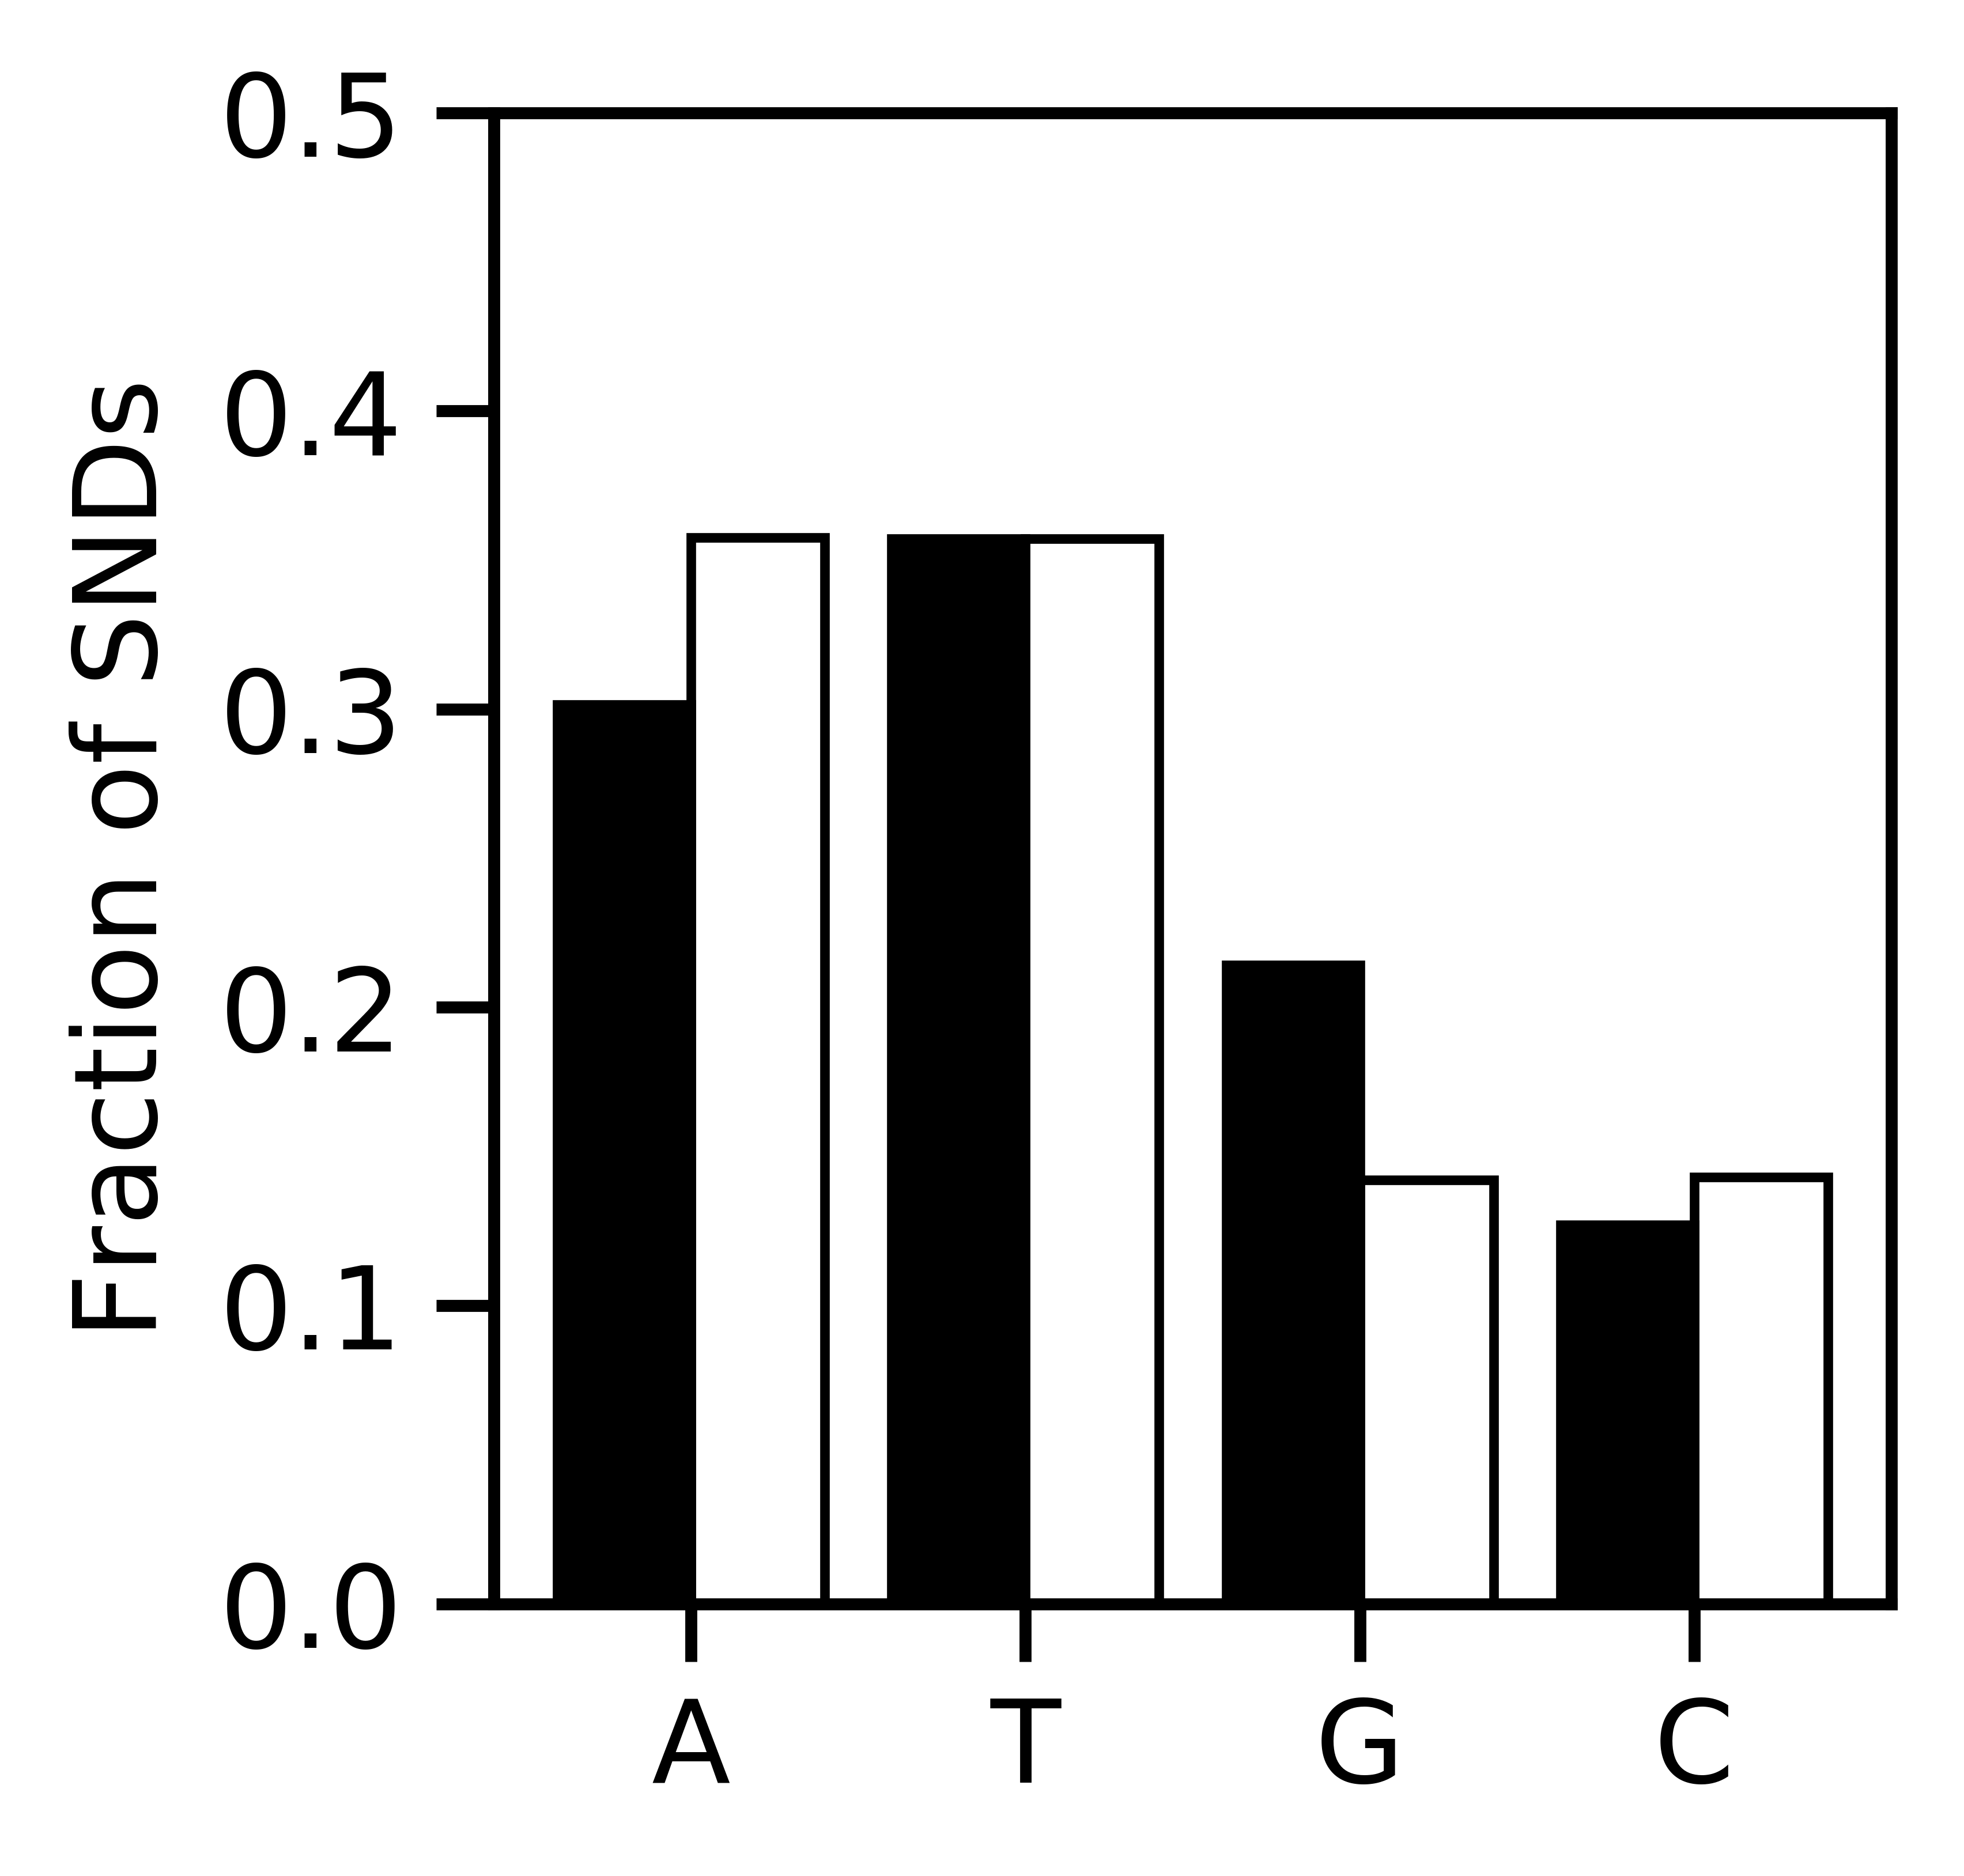

In [28]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_snd, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_snd, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of SNDs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('SupFigure5a.pdf')

In [29]:
ra = allel.vcf_to_recarray(baseline_SNI)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_sni = counts/len(variants)

In [30]:
ra = allel.vcf_to_recarray(de_novo_SNI)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_sni = counts/len(variants)

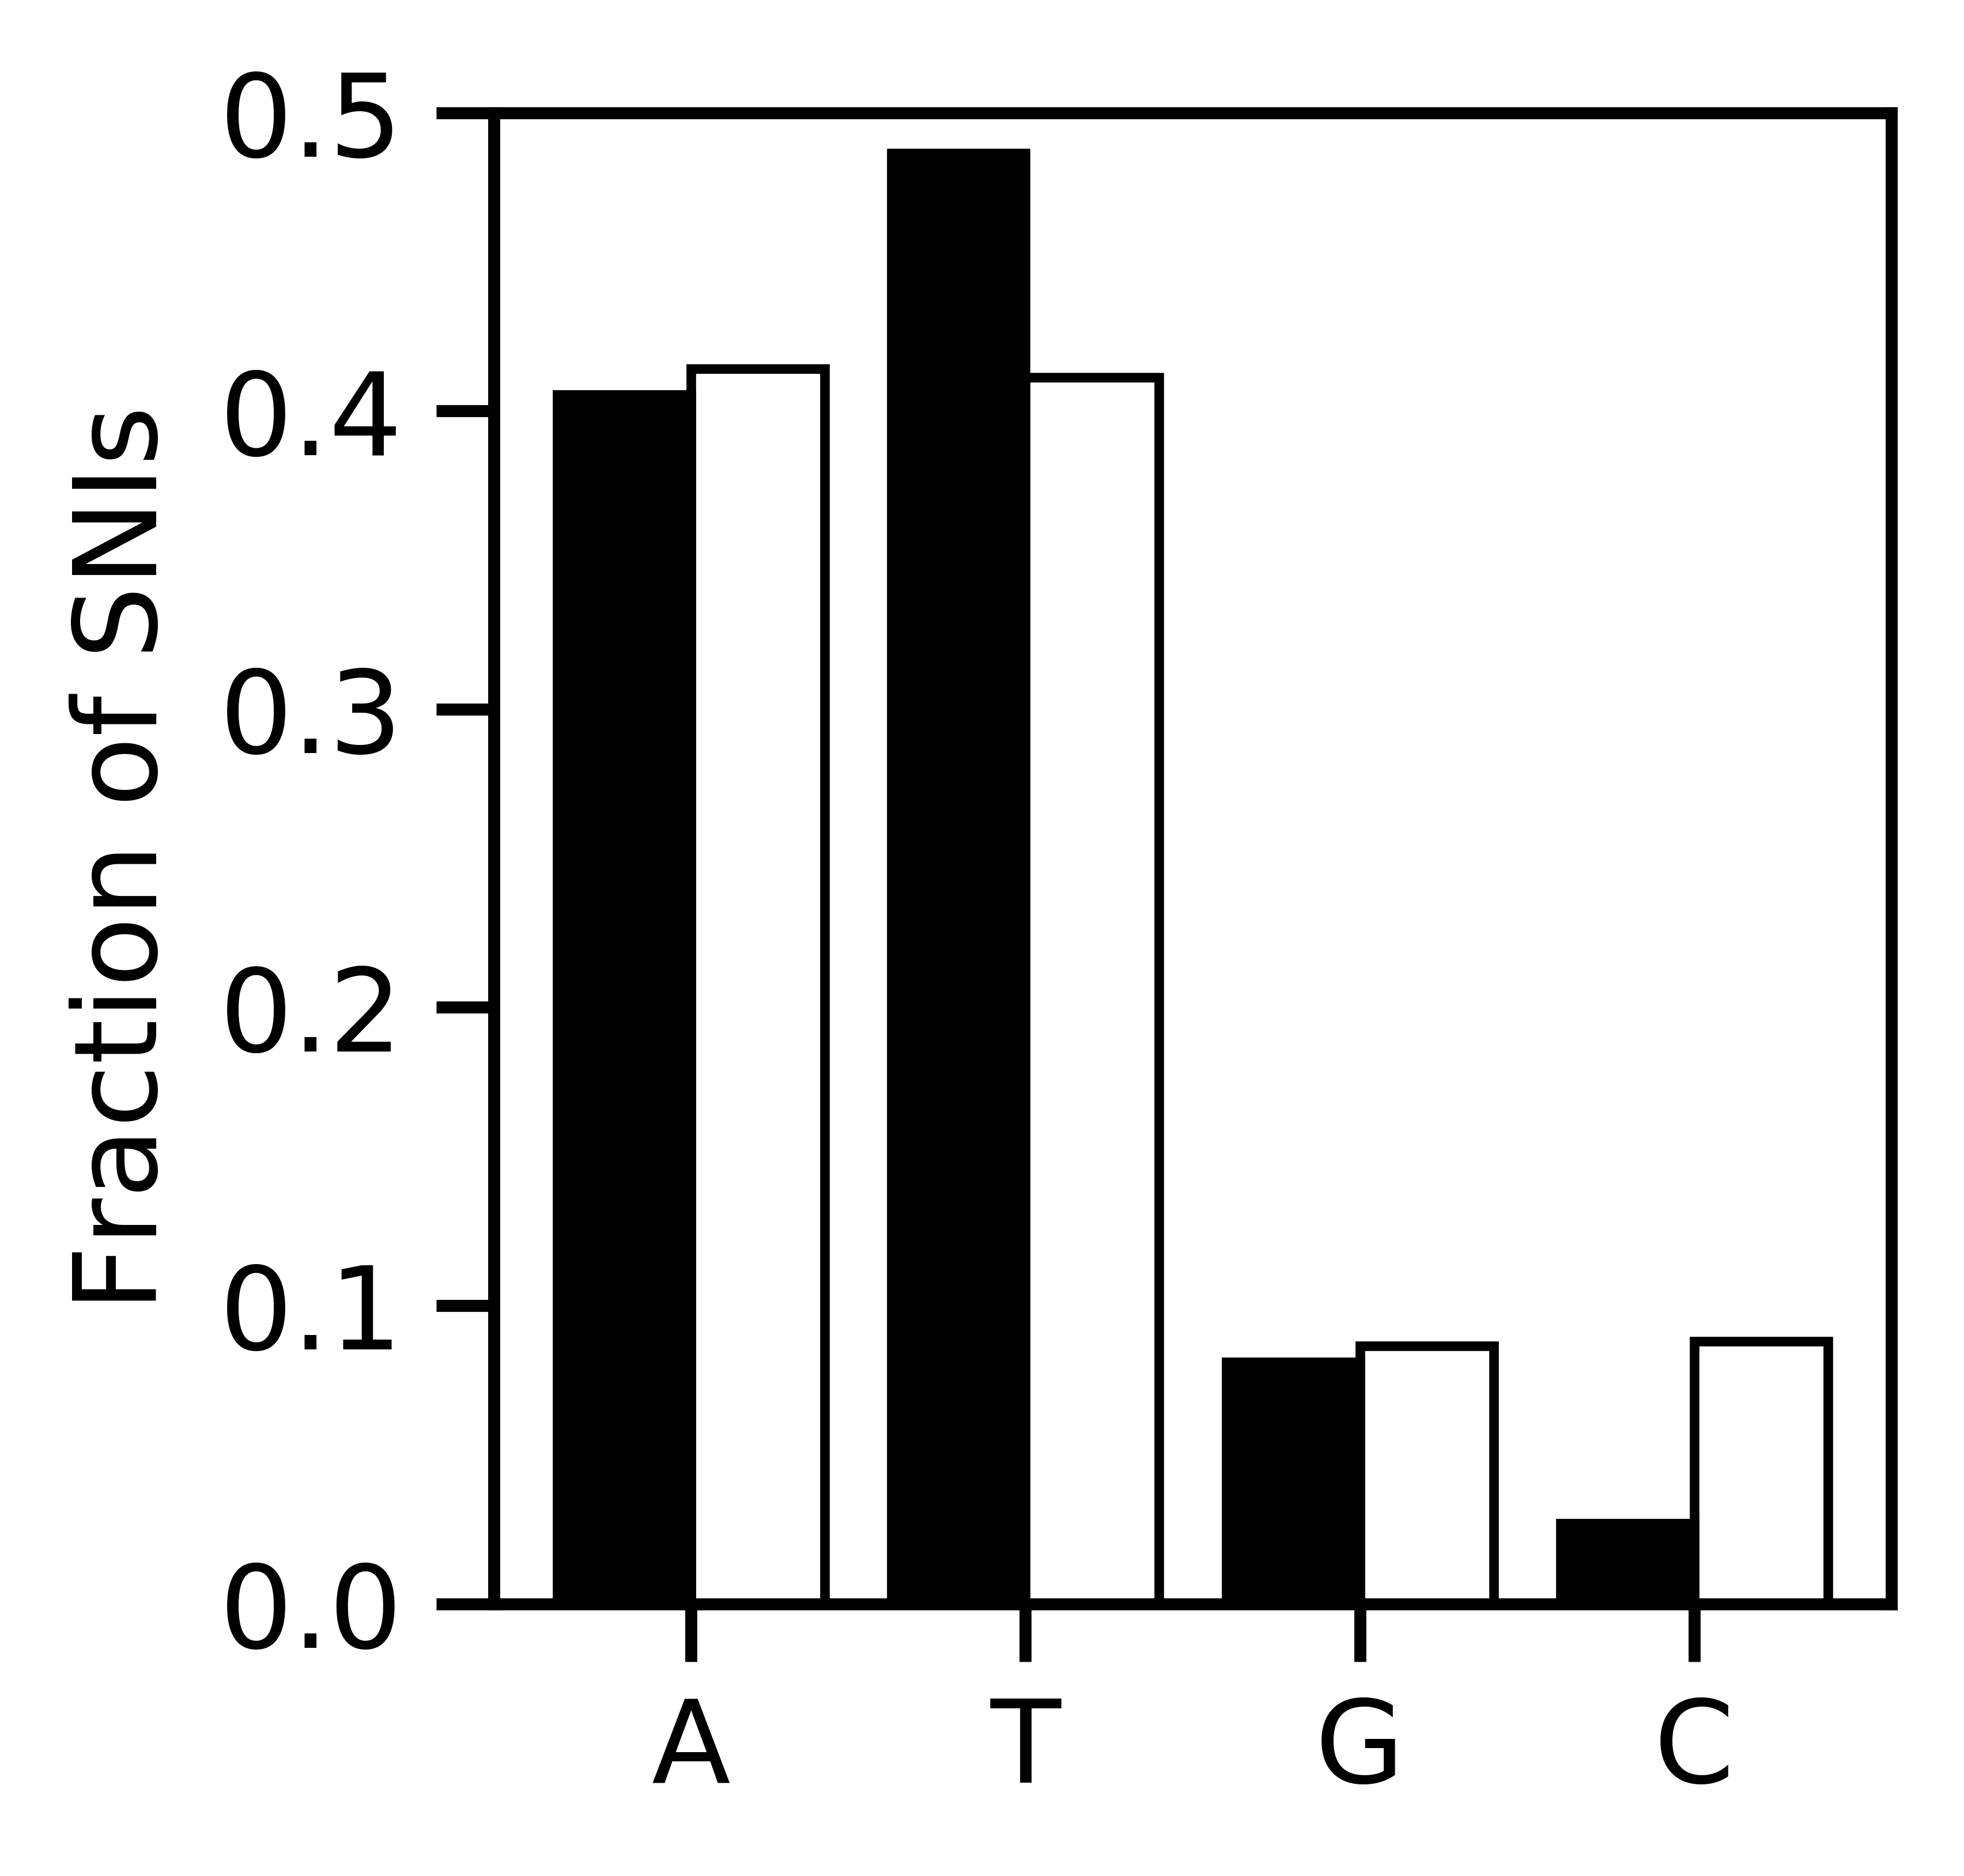

In [31]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_sni, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_sni, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of SNIs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('SupFigure5b.pdf')

#### SNDs in unique context

In [4]:
bl_snd_unique = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/BL107_SNDs_unique.vcf'
dn_snd_unique = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/FN27_SNDs_unique.vcf'
bl_sni_unique = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/BL107_SNIs_unique.vcf'
dn_sni_unique = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/FN27_SNIs_unique.vcf'

In [5]:
bl_snd_unique_h5 = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/BL107_SNDs_unique.h5'
dn_snd_unique_h5 = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/FN27_SNDs_unique.h5'
bl_sni_unique_h5 = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/BL107_SNIs_unique.h5'
dn_sni_unique_h5 = '/panfs/roc/groups/9/morrellp/shared/Projects/Context_Of_Mutations/analysis/de_novo/repeat_context_analysis/FN27_SNIs_unique.h5'

In [6]:
allel.vcf_to_hdf5(bl_snd_unique, bl_snd_unique_h5, fields='*', overwrite=True)
allel.vcf_to_hdf5(dn_snd_unique, dn_snd_unique_h5, fields='*', overwrite=True)
allel.vcf_to_hdf5(bl_sni_unique, bl_sni_unique_h5, fields='*', overwrite=True)
allel.vcf_to_hdf5(dn_sni_unique, dn_sni_unique_h5, fields='*', overwrite=True)

In [7]:
callset_bl_snd_unique = h5py.File(bl_snd_unique_h5, mode='r')
callset_dn_snd_unique = h5py.File(dn_snd_unique_h5, mode='r')
callset_bl_sni_unique = h5py.File(bl_sni_unique_h5, mode='r')
callset_dn_sni_unique = h5py.File(dn_sni_unique_h5, mode='r')

In [8]:
variants_bl_snd_unique = allel.VariantChunkedTable(callset_bl_snd_unique['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_bl_sni_unique = allel.VariantChunkedTable(callset_bl_sni_unique['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_snd_unique = allel.VariantChunkedTable(callset_dn_snd_unique['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])
variants_dn_sni_unique = allel.VariantChunkedTable(callset_dn_sni_unique['variants'], 
                                     names=['POS', 'REF', 'ALT', 'DP', 'MQ', 'QD', 'AC'])

In [9]:
variants = variants_bl_snd_unique
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_snd_unique = counts/len(variants)

In [10]:
variants = variants_dn_snd_unique
filter_A = '(REF == "GA") | (REF == "TA") | (REF == "CA") | (REF == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(REF == "GT") | (REF == "TT") | (REF == "CT") | (REF == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(REF == "GG") | (REF == "TG") | (REF == "CG") | (REF == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(REF == "GC") | (REF == "TC") | (REF == "CC") | (REF == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_snd_unique = counts/len(variants)

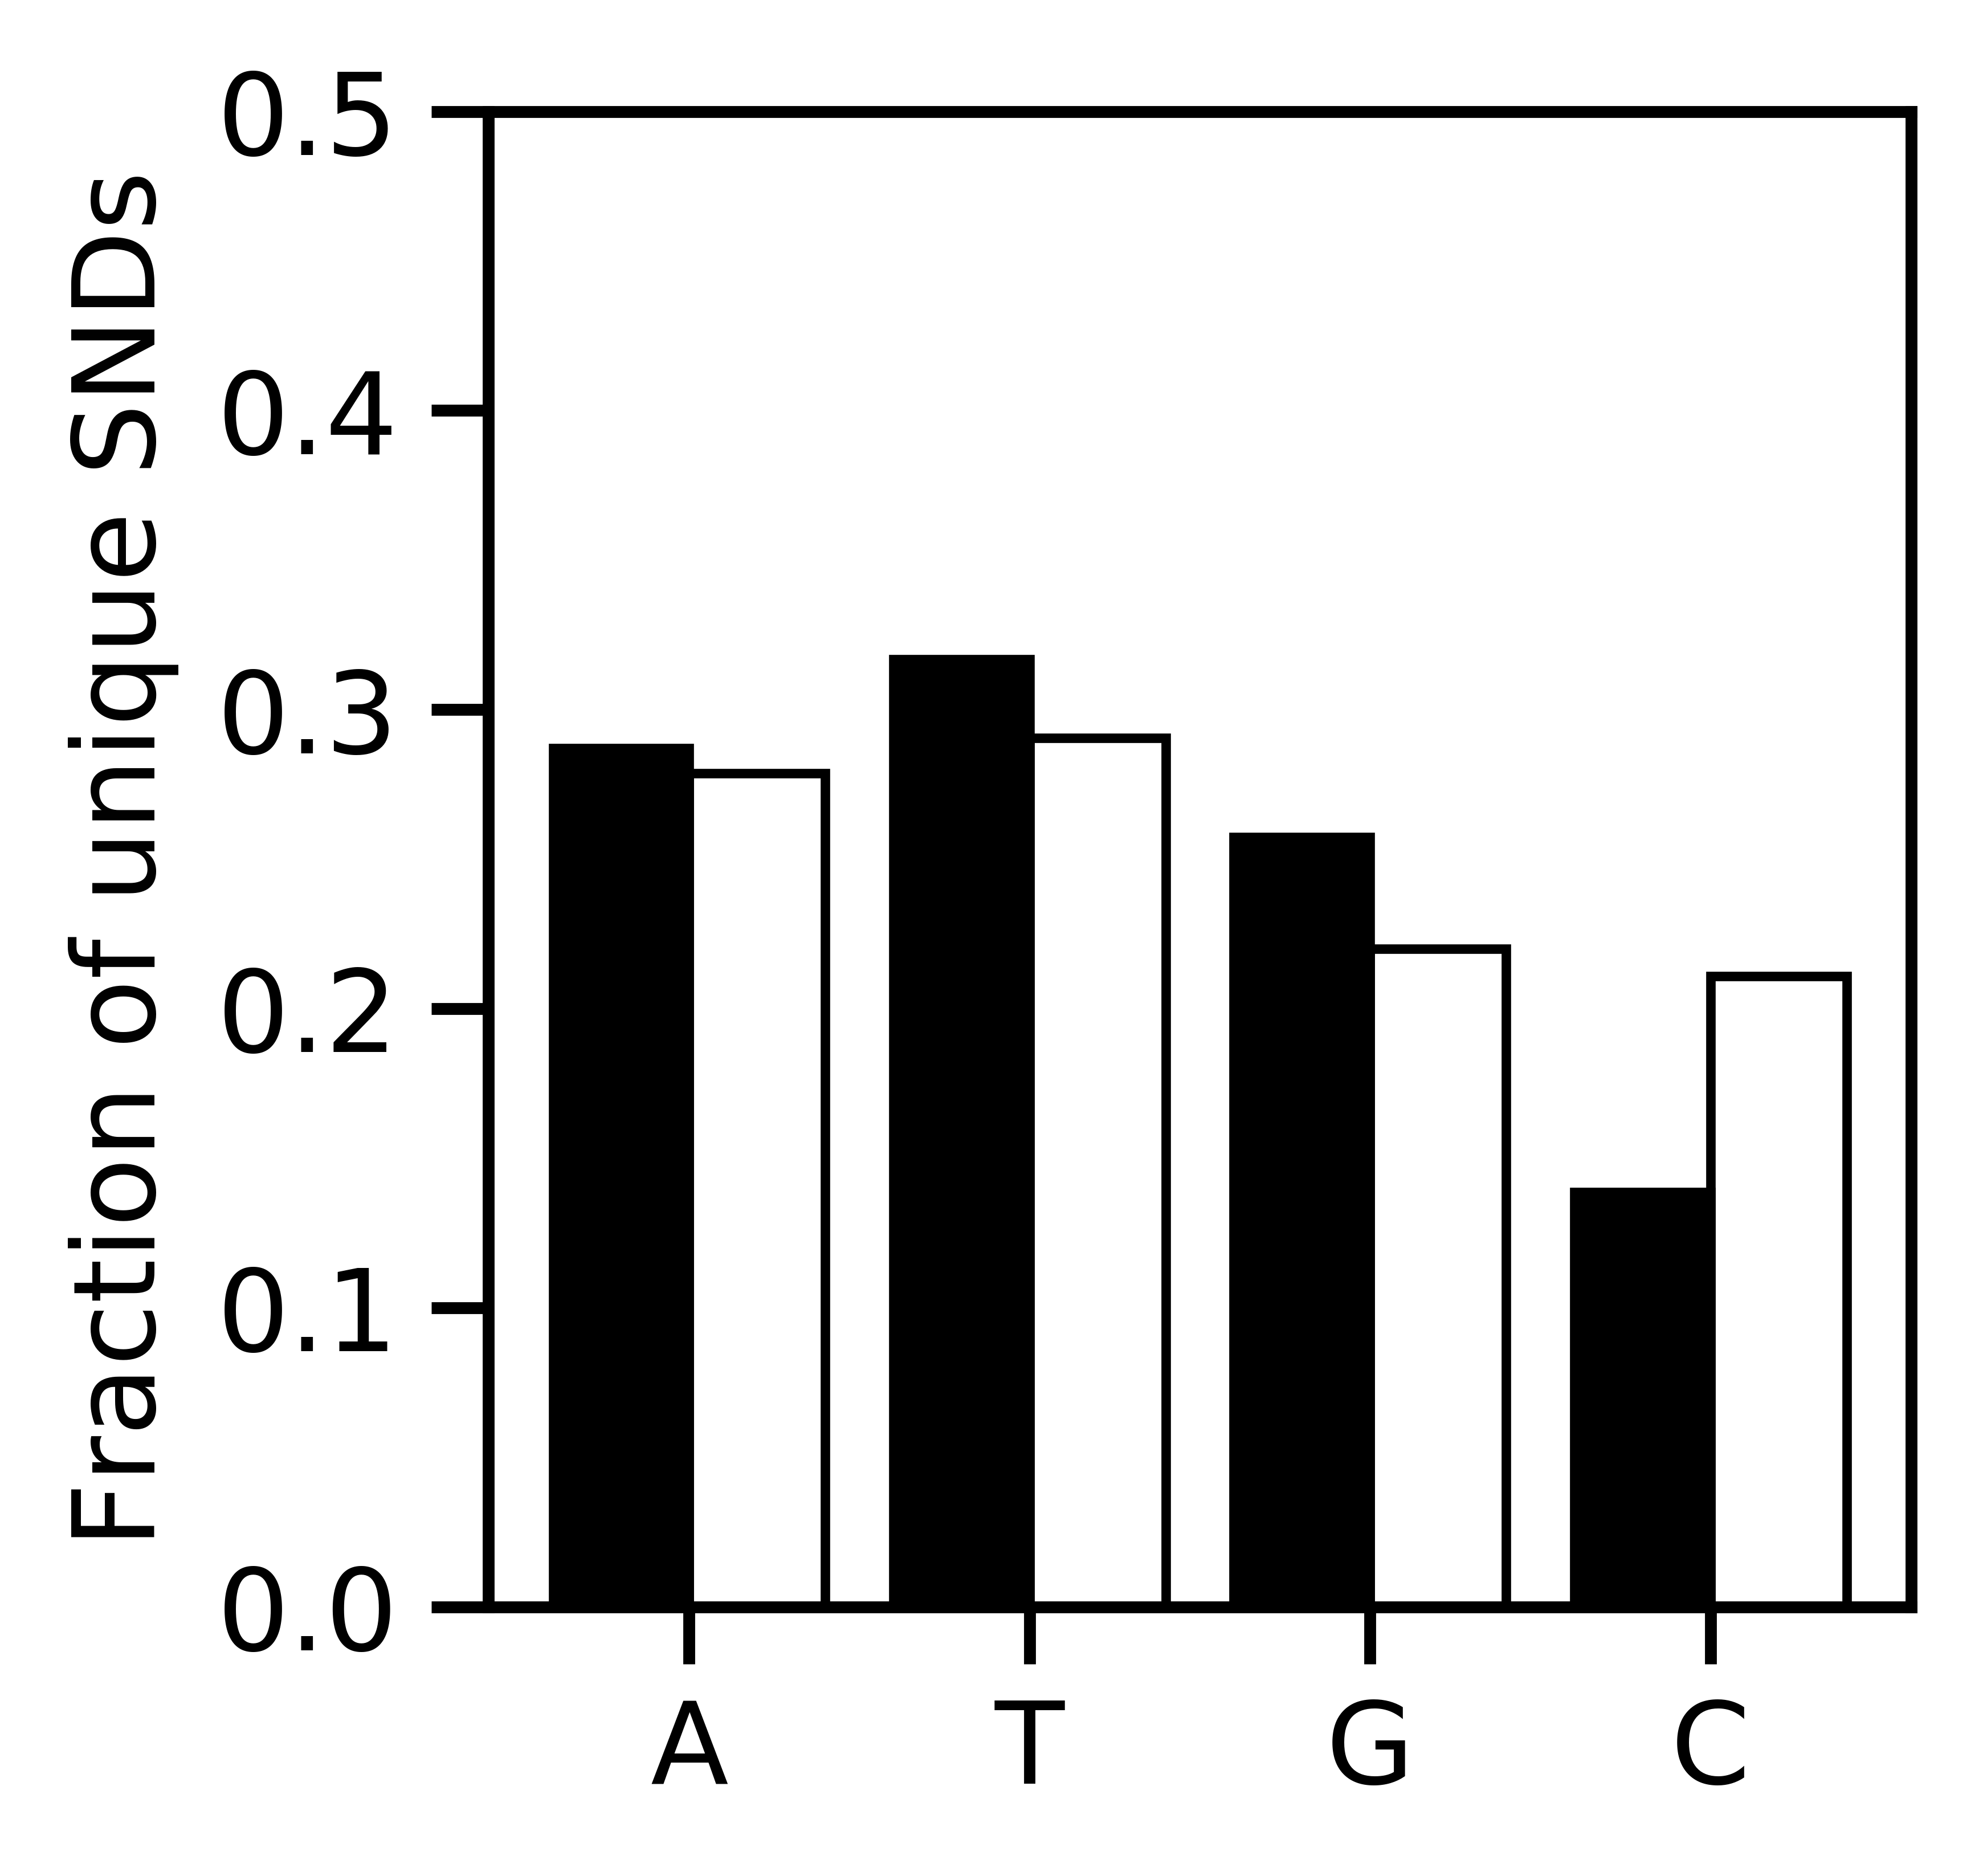

In [18]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_snd_unique, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_snd_unique, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of unique SNDs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('unique_snd_spectrum.pdf')

In [14]:
ra = allel.vcf_to_recarray(bl_sni_unique)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_bl_sni_unique = counts/len(variants)

In [15]:
ra = allel.vcf_to_recarray(dn_sni_unique)
variants = allel.VariantTable(ra)
filter_A = '(ALT_1 == "GA") | (ALT_1 == "TA") | (ALT_1 == "CA") | (ALT_1 == "AA")'
selection_A = variants.eval(filter_A)[:]
variants_A = variants.compress(selection_A)
filter_T = '(ALT_1 == "GT") | (ALT_1 == "TT") | (ALT_1 == "CT") | (ALT_1 == "AT")'
selection_T = variants.eval(filter_T)[:]
variants_T = variants.compress(selection_T)
filter_G = '(ALT_1 == "GG") | (ALT_1 == "TG") | (ALT_1 == "CG") | (ALT_1 == "AG")'
selection_G = variants.eval(filter_G)[:]
variants_G = variants.compress(selection_G)
filter_C = '(ALT_1 == "GC") | (ALT_1 == "TC") | (ALT_1 == "CC") | (ALT_1 == "AC")'
selection_C = variants.eval(filter_C)[:]
variants_C = variants.compress(selection_C)
counts = np.array([len(variants_A), len(variants_T), len(variants_G), len(variants_C)])
counts_dn_sni_unique = counts/len(variants)

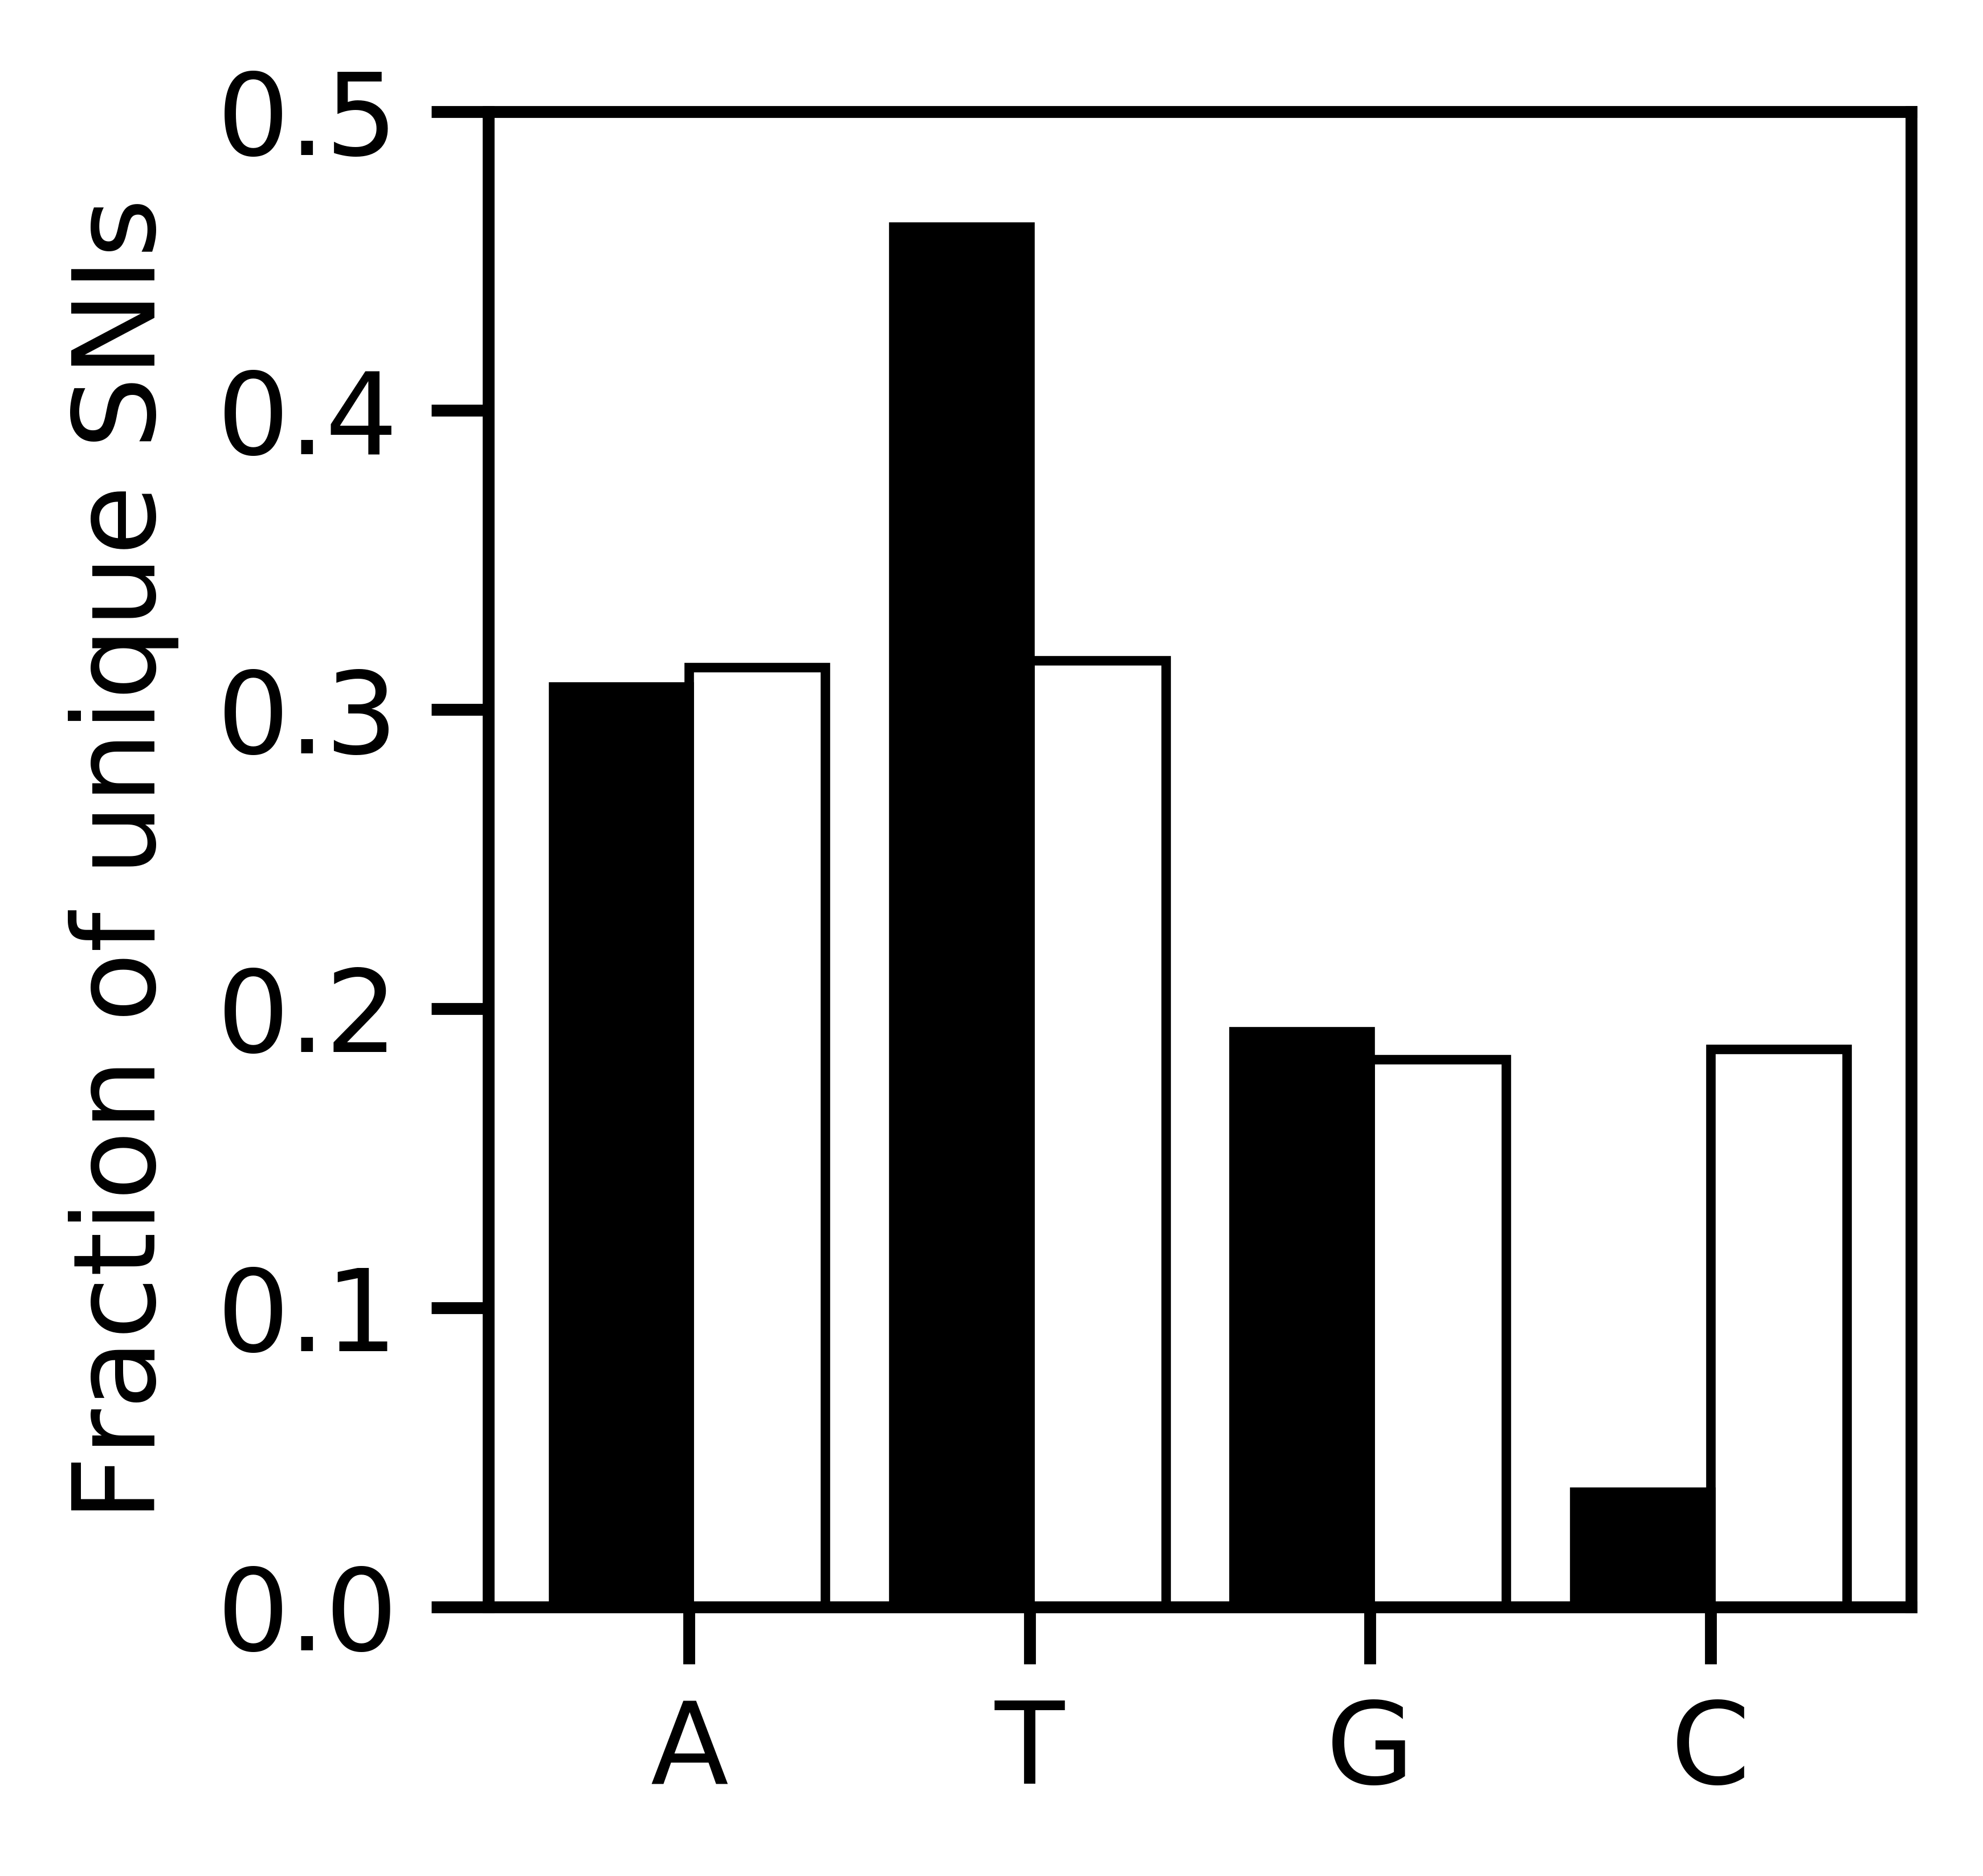

In [17]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(nucleotides+0.2, counts_bl_sni_unique, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(nucleotides-0.2, counts_dn_sni_unique, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of unique SNIs');
#ax.set_xlabel('Nucleotide');
ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(nucleotides, ('A', 'T', 'G', 'C'))
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('unique_sni_spectrum.pdf')

## Mutation frequency spectrum
From bcftools stats

In [32]:
labels = ["A>C", "A>G", "A>T", "C>A", "C>G", "C>T", "G>A", "G>C", "G>T", "T>A", "T>C", "T>G"]
label_nums = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
dn_asym = [57, 114, 80, 77, 39, 319, 336, 31, 82, 98, 135, 62]
bl_asym = [342243, 1213249, 544888, 511105, 267083, 2016587, 2018904, 265592, 513823, 546312, 1213807, 342763]

In [33]:
bl_asym_norm = bl_asym/np.sum(bl_asym)
dn_asym_norm = dn_asym/np.sum(dn_asym)

In [42]:
labels_sym = ["A>C*", "A>T*", "C>A*", "C>G*", "A>G*", "C>T*"]
label_nums_sym = np.array([1, 2, 3, 4, 5, 6])
dn_sym = [57+62, 80+98, 77+82, 39+31, 114+135, 319+336]
bl_sym = [342243+342763, 544888+546312, 511105+513823, 267083+265592, 1213249+1213807, 2016587+2018904]

In [20]:
(2016587+2018904)/(2016587+2018904+1213249+1213807)

0.6244428086944668

In [21]:
(1213249+1213807)/(2016587+2018904+1213249+1213807)

0.3755571913055333

In [35]:
bl_sym_norm = bl_sym/np.sum(bl_sym)
dn_sym_norm = dn_sym/np.sum(dn_sym)

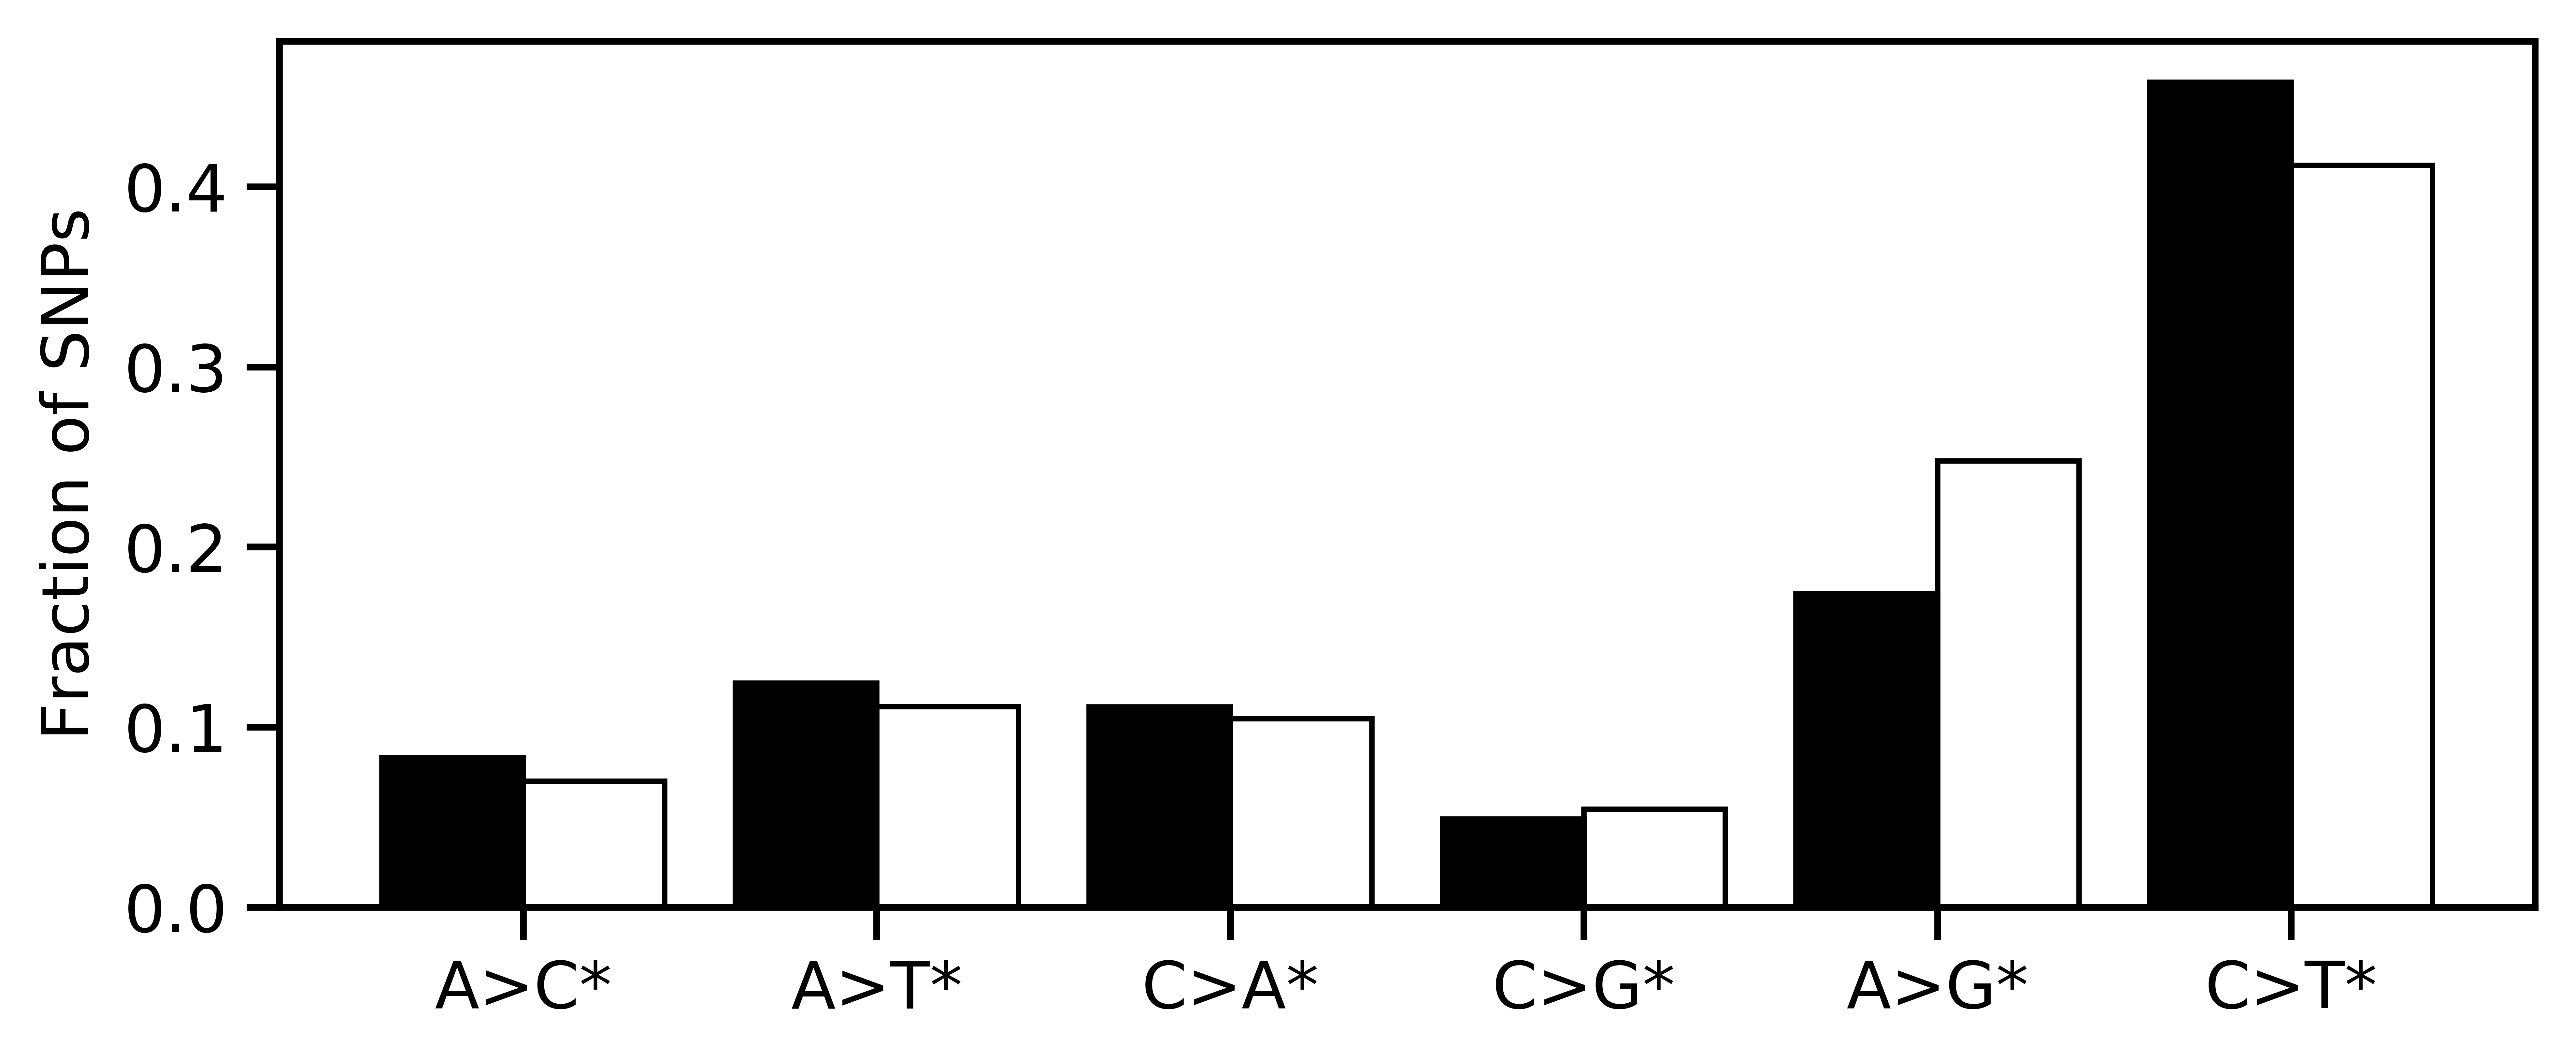

In [43]:
fig, ax = plt.subplots(figsize=(6.75, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.bar(label_nums_sym+0.2, bl_sym_norm, width=0.4, color='white', edgecolor='black', linewidth='1')
plt.bar(label_nums_sym-0.2, dn_sym_norm, width=0.4, color='black', edgecolor='black', linewidth='1')
ax.set_ylabel('Fraction of SNPs');
#ax.set_xlabel('Nucleotide');
#ax.set_ylim(0,0.5)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('Figure3.pdf')

## Variant counts per individual

In [55]:
vcpi = allel.read_vcf(de_novo)
gt = allel.GenotypeArray(vcpi['calldata/GT'])
index = gt.n_samples
samps = vcpi['samples']

In [56]:
stats = np.ndarray(shape=(27,3), dtype=np.int32)
for i in range(0, index):
        stats.itemset((i, 0), i+1)
        #print(str(i+1) + ': ' + str(samps[i]))
        stats.itemset((i, 1), gt[:,i].count_missing())
        stats.itemset((i, 2), gt[:,i].count_hom_alt())

In [57]:
radiation = np.array([8, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 32, 32, 32, 16, 16, 32, 16, 16, 16, 16, 32, 32, 32, 32])

In [58]:
#print('\tSample\tMissing\tHom_Alt')
#stats

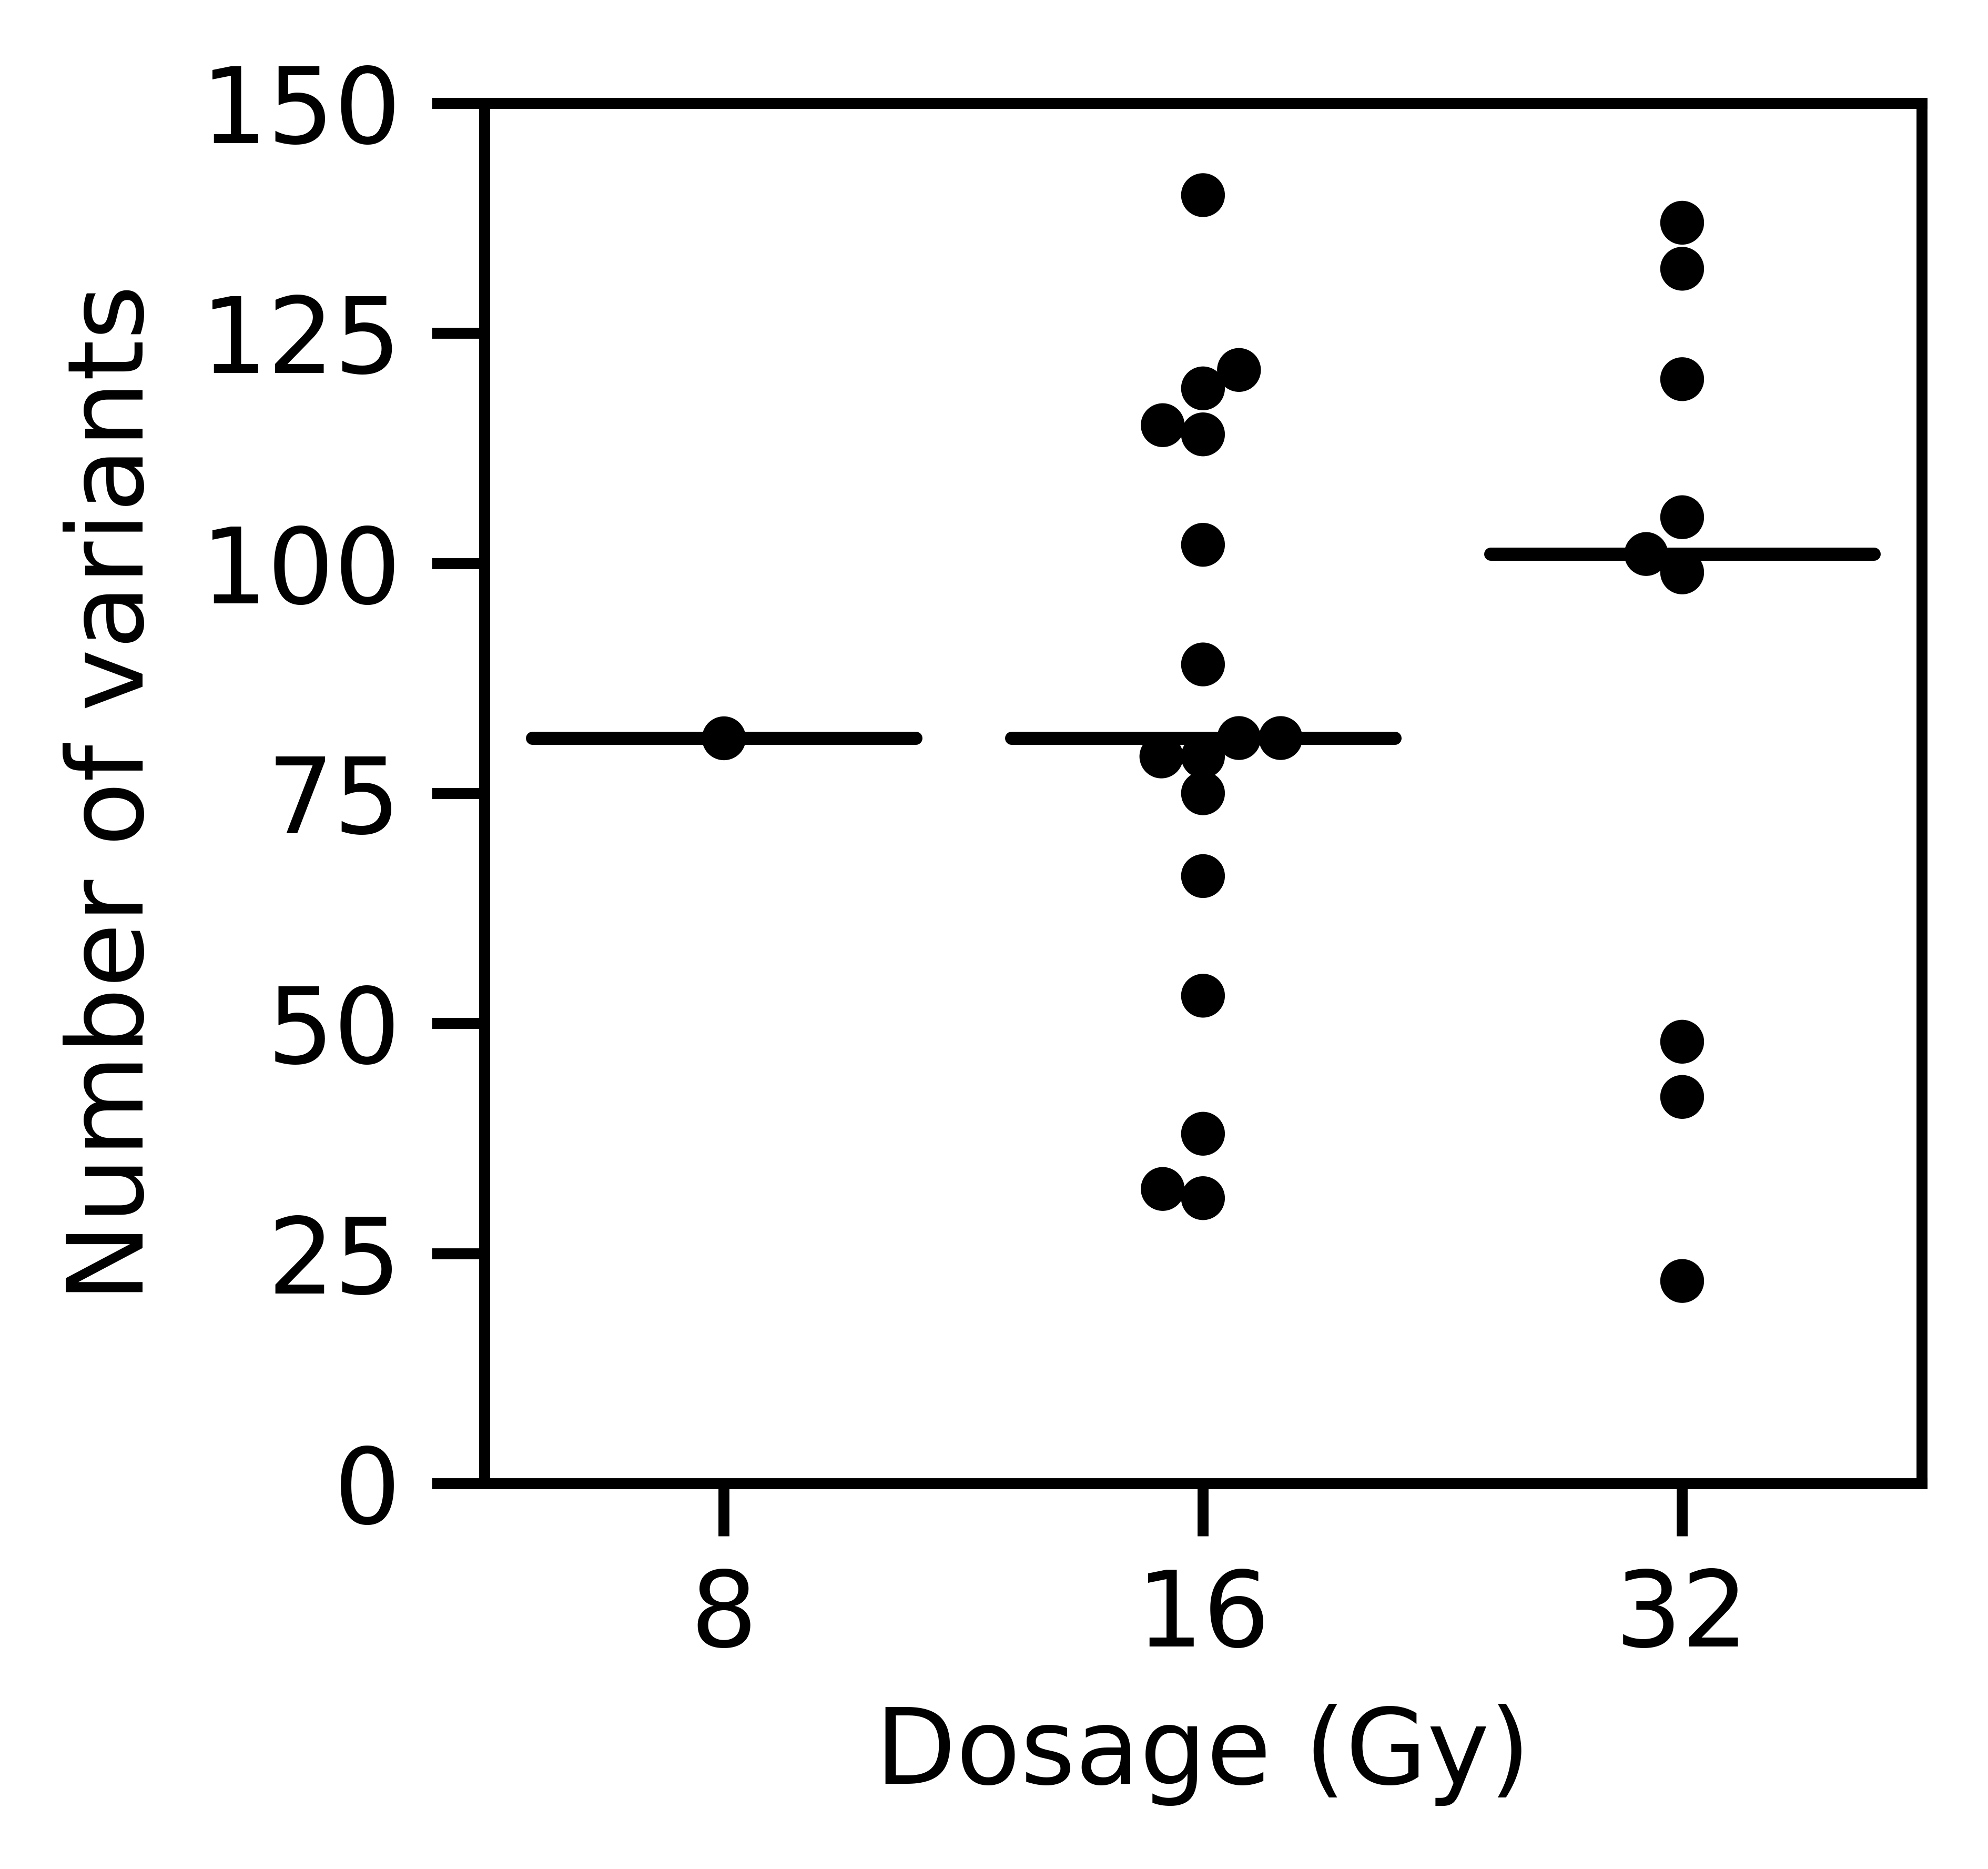

In [59]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
ax = sns.swarmplot(radiation, stats[:,2], color='black')
ax = sns.boxplot(radiation, stats[:,2], color='black',
        showcaps=False,boxprops={'facecolor':'None', 'linewidth':'0'},
        showfliers=True,whiskerprops={'linewidth':0})
ax.set_ylabel('Number of variants');
ax.set_xlabel('Dosage (Gy)');
ax.set_ylim(0, 150)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('SupFigure4.pdf')

### SNPs by Indels by Dosage

In [81]:
# SNP counts
stats_spl[:,1]
# Indel counts
stats_ipl[:,1]
# Dosage
radiation = np.array([8, 16, 16, 16, 16, 16, 16, 16, 16, 32, 16, 16, 16, 32, 32, 32, 16, 16, 32, 16, 16, 16, 16, 32, 32, 32, 32])
# Coverage
coverage = np.array([28, 30, 40, 29, 28, 30, 29, 30, 20, 20, 28, 33, 29, 19, 28, 29, 25, 29, 31, 24, 30, 32, 29, 26, 20, 18, 19])

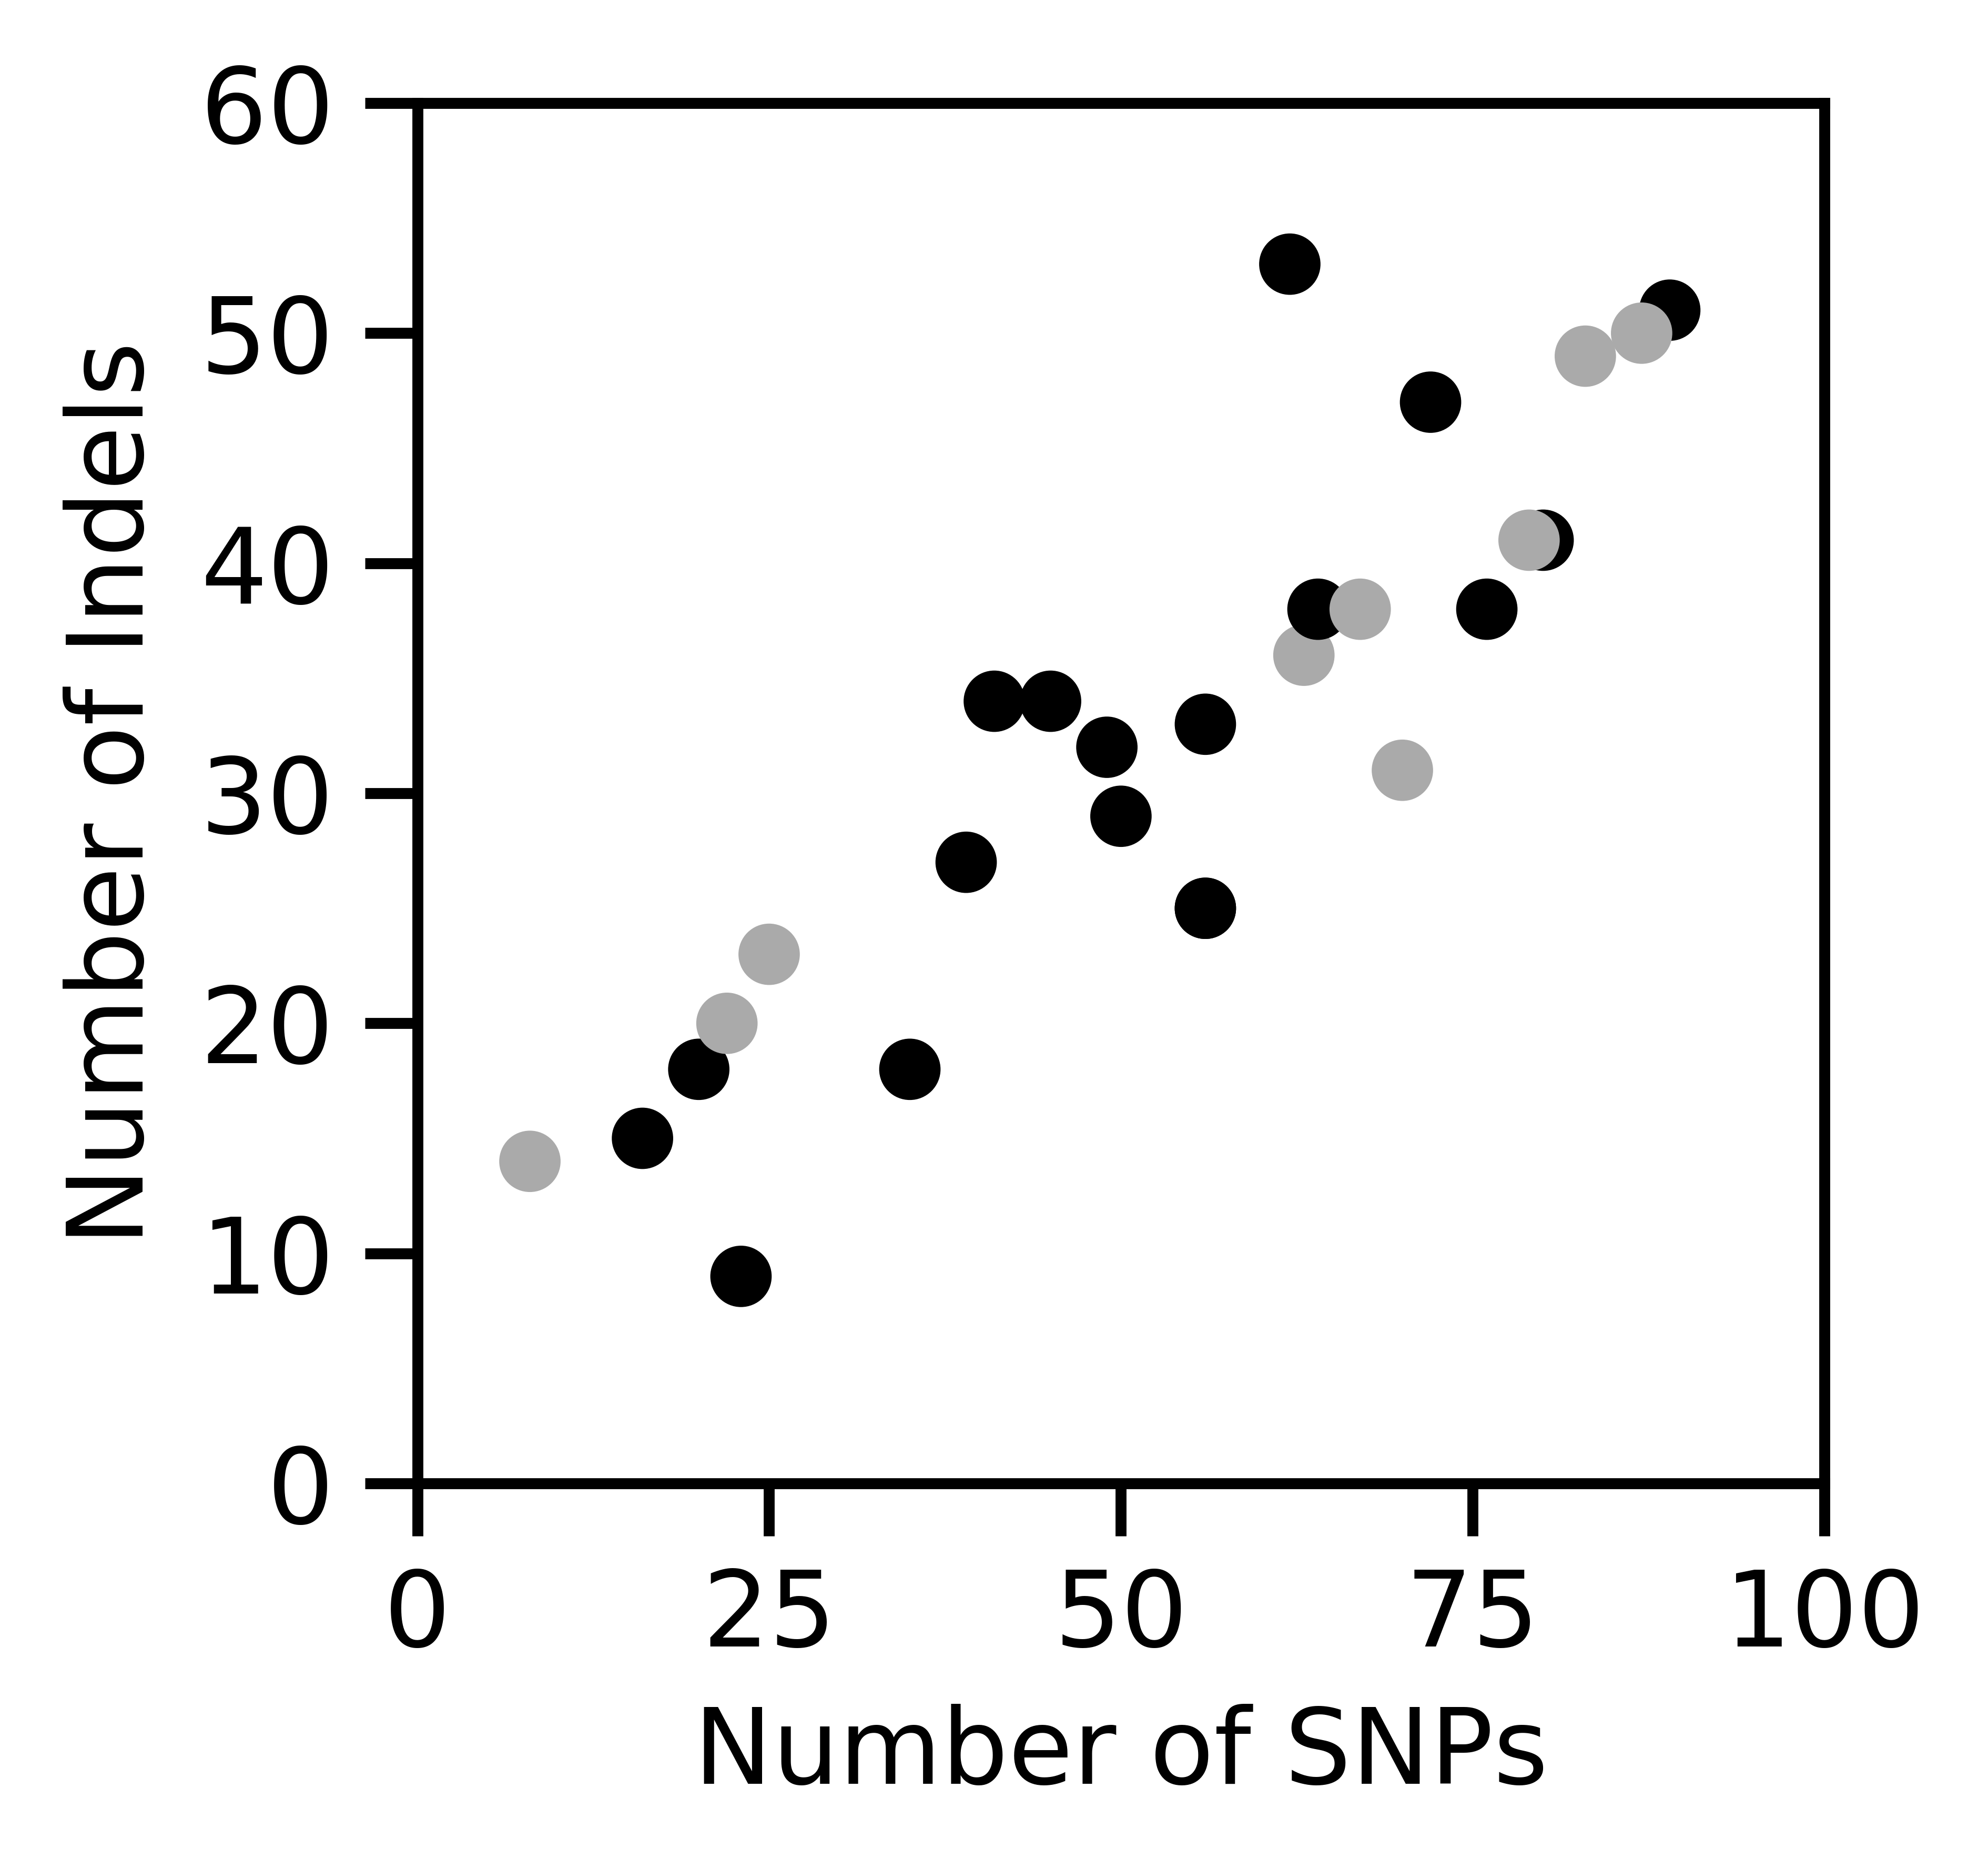

In [114]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.scatter(stats_spl[:,1], stats_ipl[:,1], c=radiation, cmap='brg')
ax.set_ylabel('Number of Indels');
ax.set_xlabel('Number of SNPs');
#plt.colorbar(label='Dosage (Gy)')
plt.clim(16, 40)
plt.gray()
ax.set_ylim(0, 60)
ax.set_xlim(0, 100)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('variants_and_dosage.pdf')

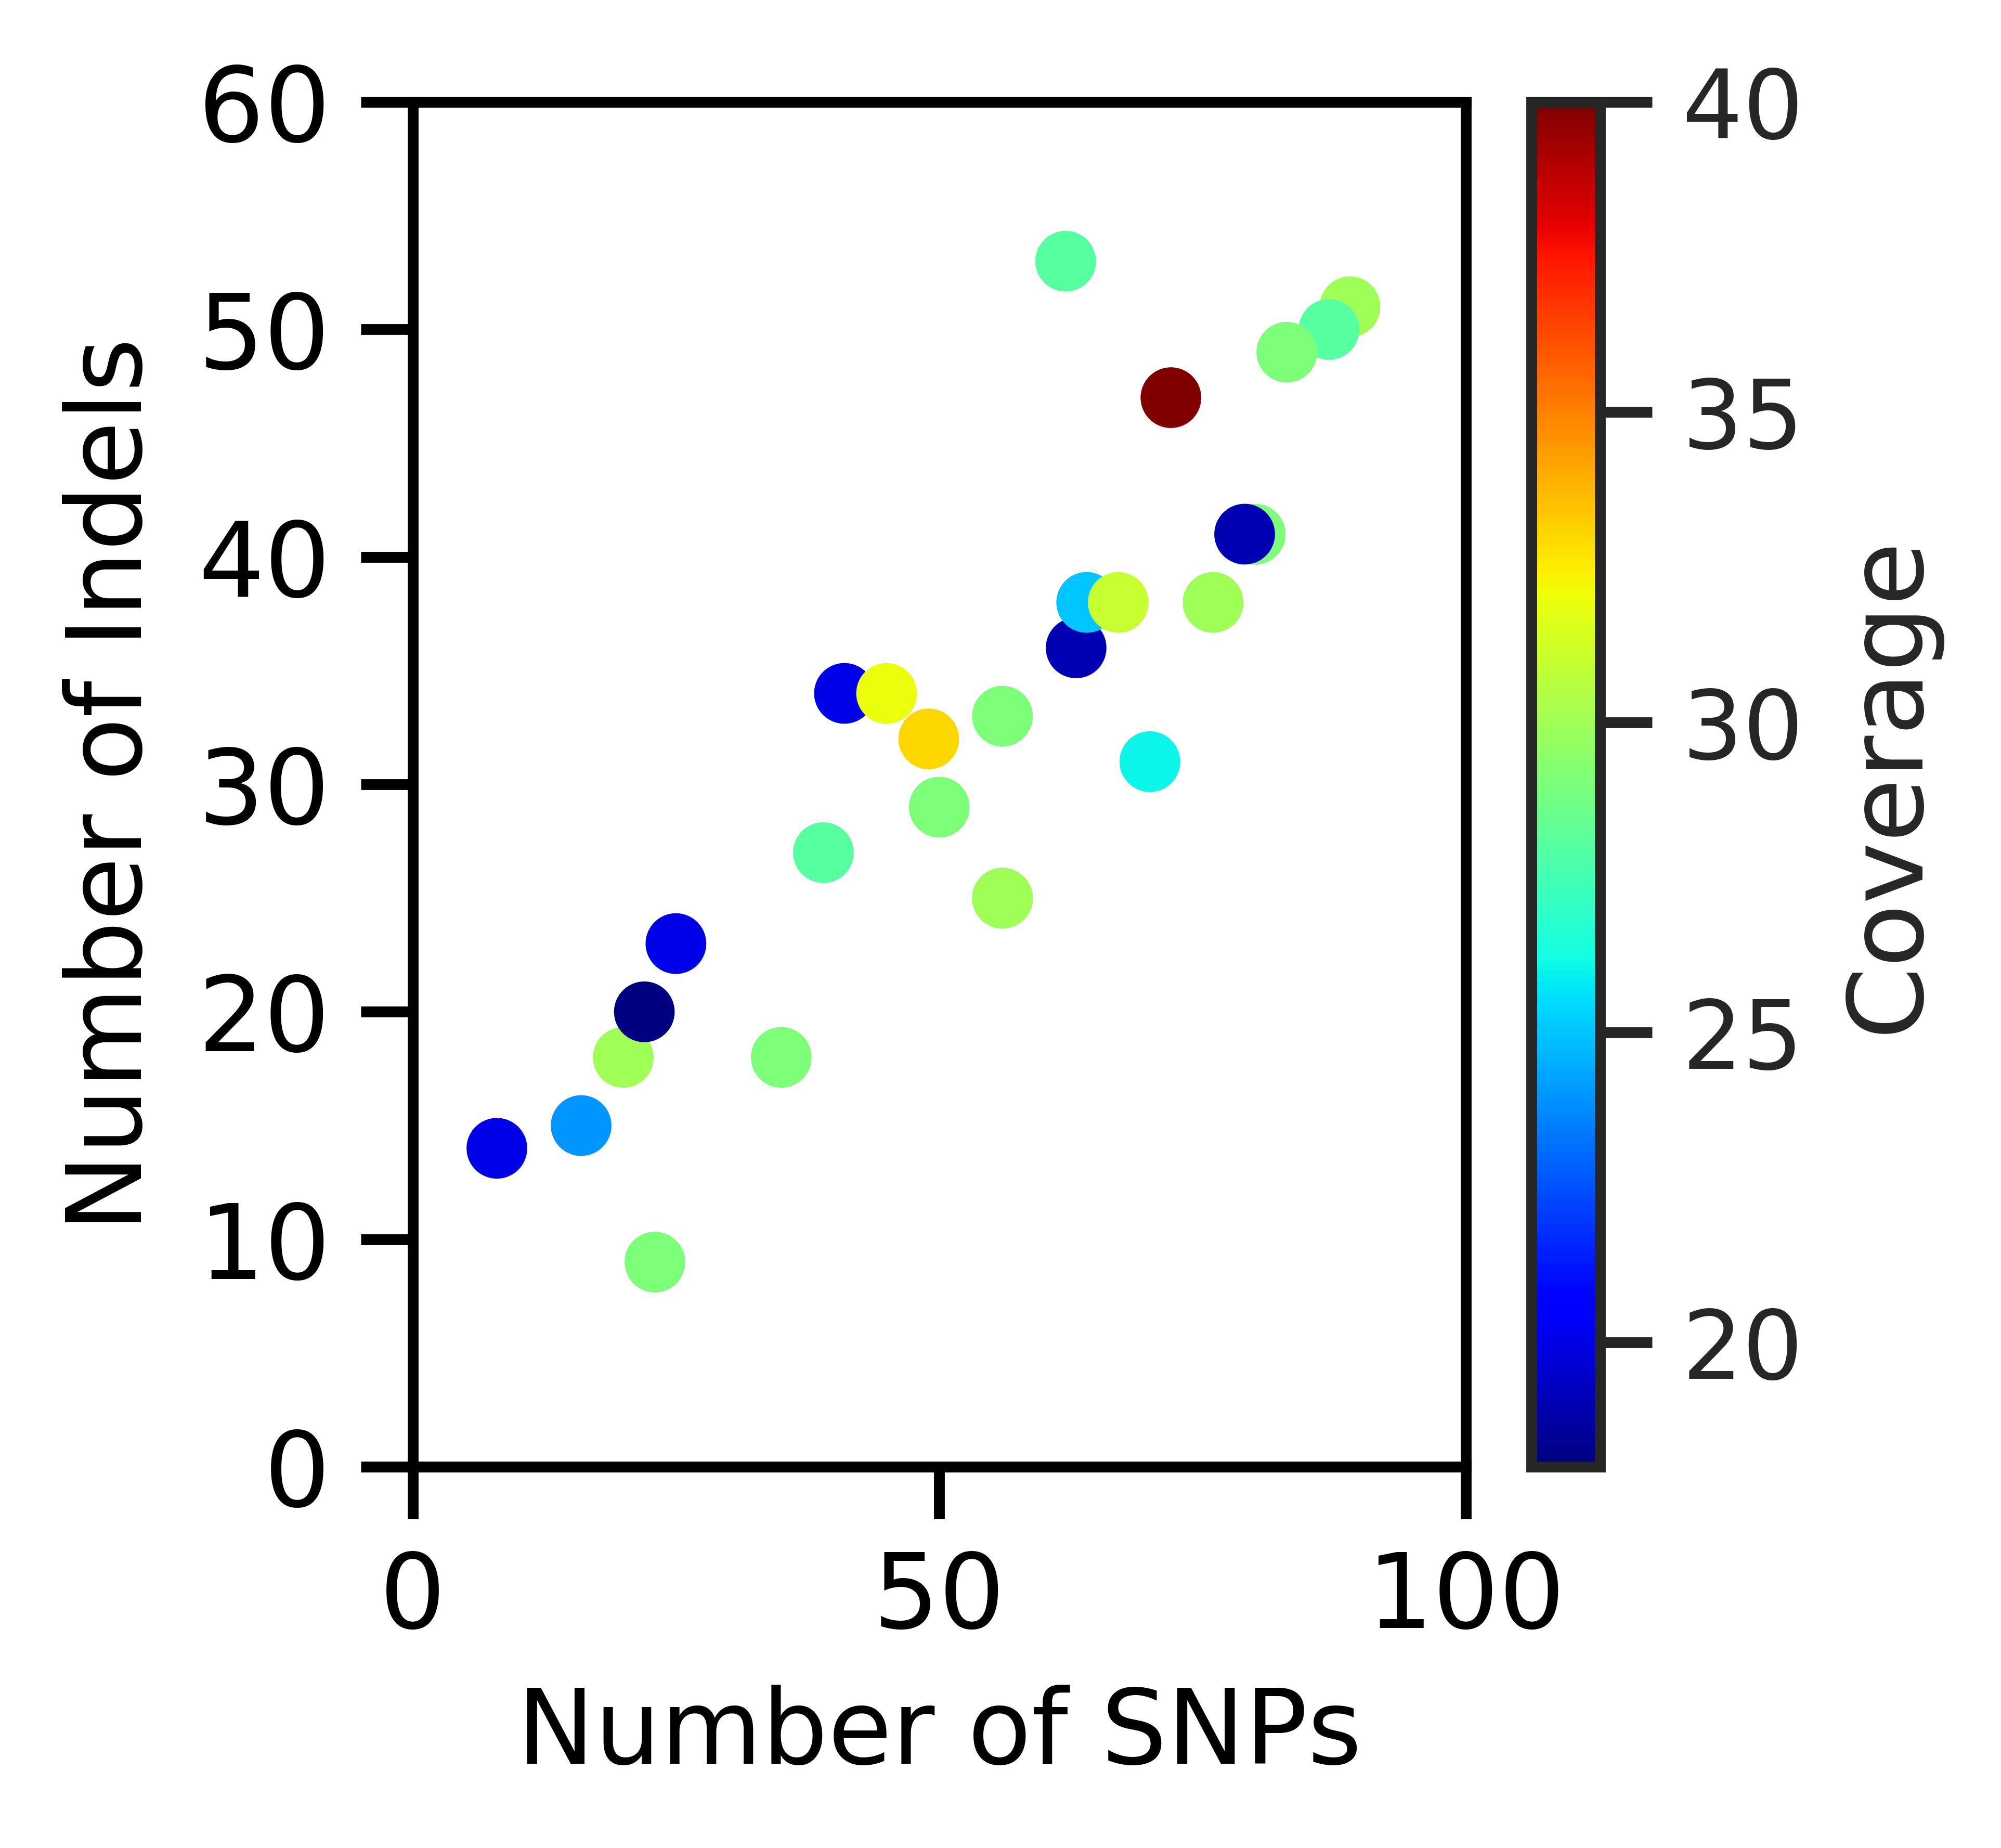

In [115]:
fig, ax = plt.subplots(figsize=(3.25, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.scatter(stats_spl[:,1], stats_ipl[:,1], c=coverage, cmap='jet')
ax.set_ylabel('Number of Indels');
ax.set_xlabel('Number of SNPs');
plt.colorbar(label='Coverage')
#plt.clim(16, 40)
ax.set_ylim(0, 60)
ax.set_xlim(0, 100)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
#plt.xticks(label_nums_sym, labels_sym)
#plt.legend(frameon=False)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('variants_and_coverage.pdf')

## Pairwise diversity

In [6]:
exec(open("/panfs/roc/groups/9/morrellp/shared/References/Reference_Sequences/Soybean/PhytozomeV11/Gmax/assembly/soybean_contigs_dict.py").read())

In [7]:
wsize = 100000
wg_pi = []
wg_pos = []
offset = 0

In [15]:
callset = allel.read_vcf(de_novo, region="Chr01")
g = allel.GenotypeArray(callset['calldata/GT'])
ac = g.count_alleles()
pos = callset['variants/POS']
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac, size=int(wsize), start=1, stop=int(chrom_lengths["Chr01"]))
window_pos = windows[:,0]

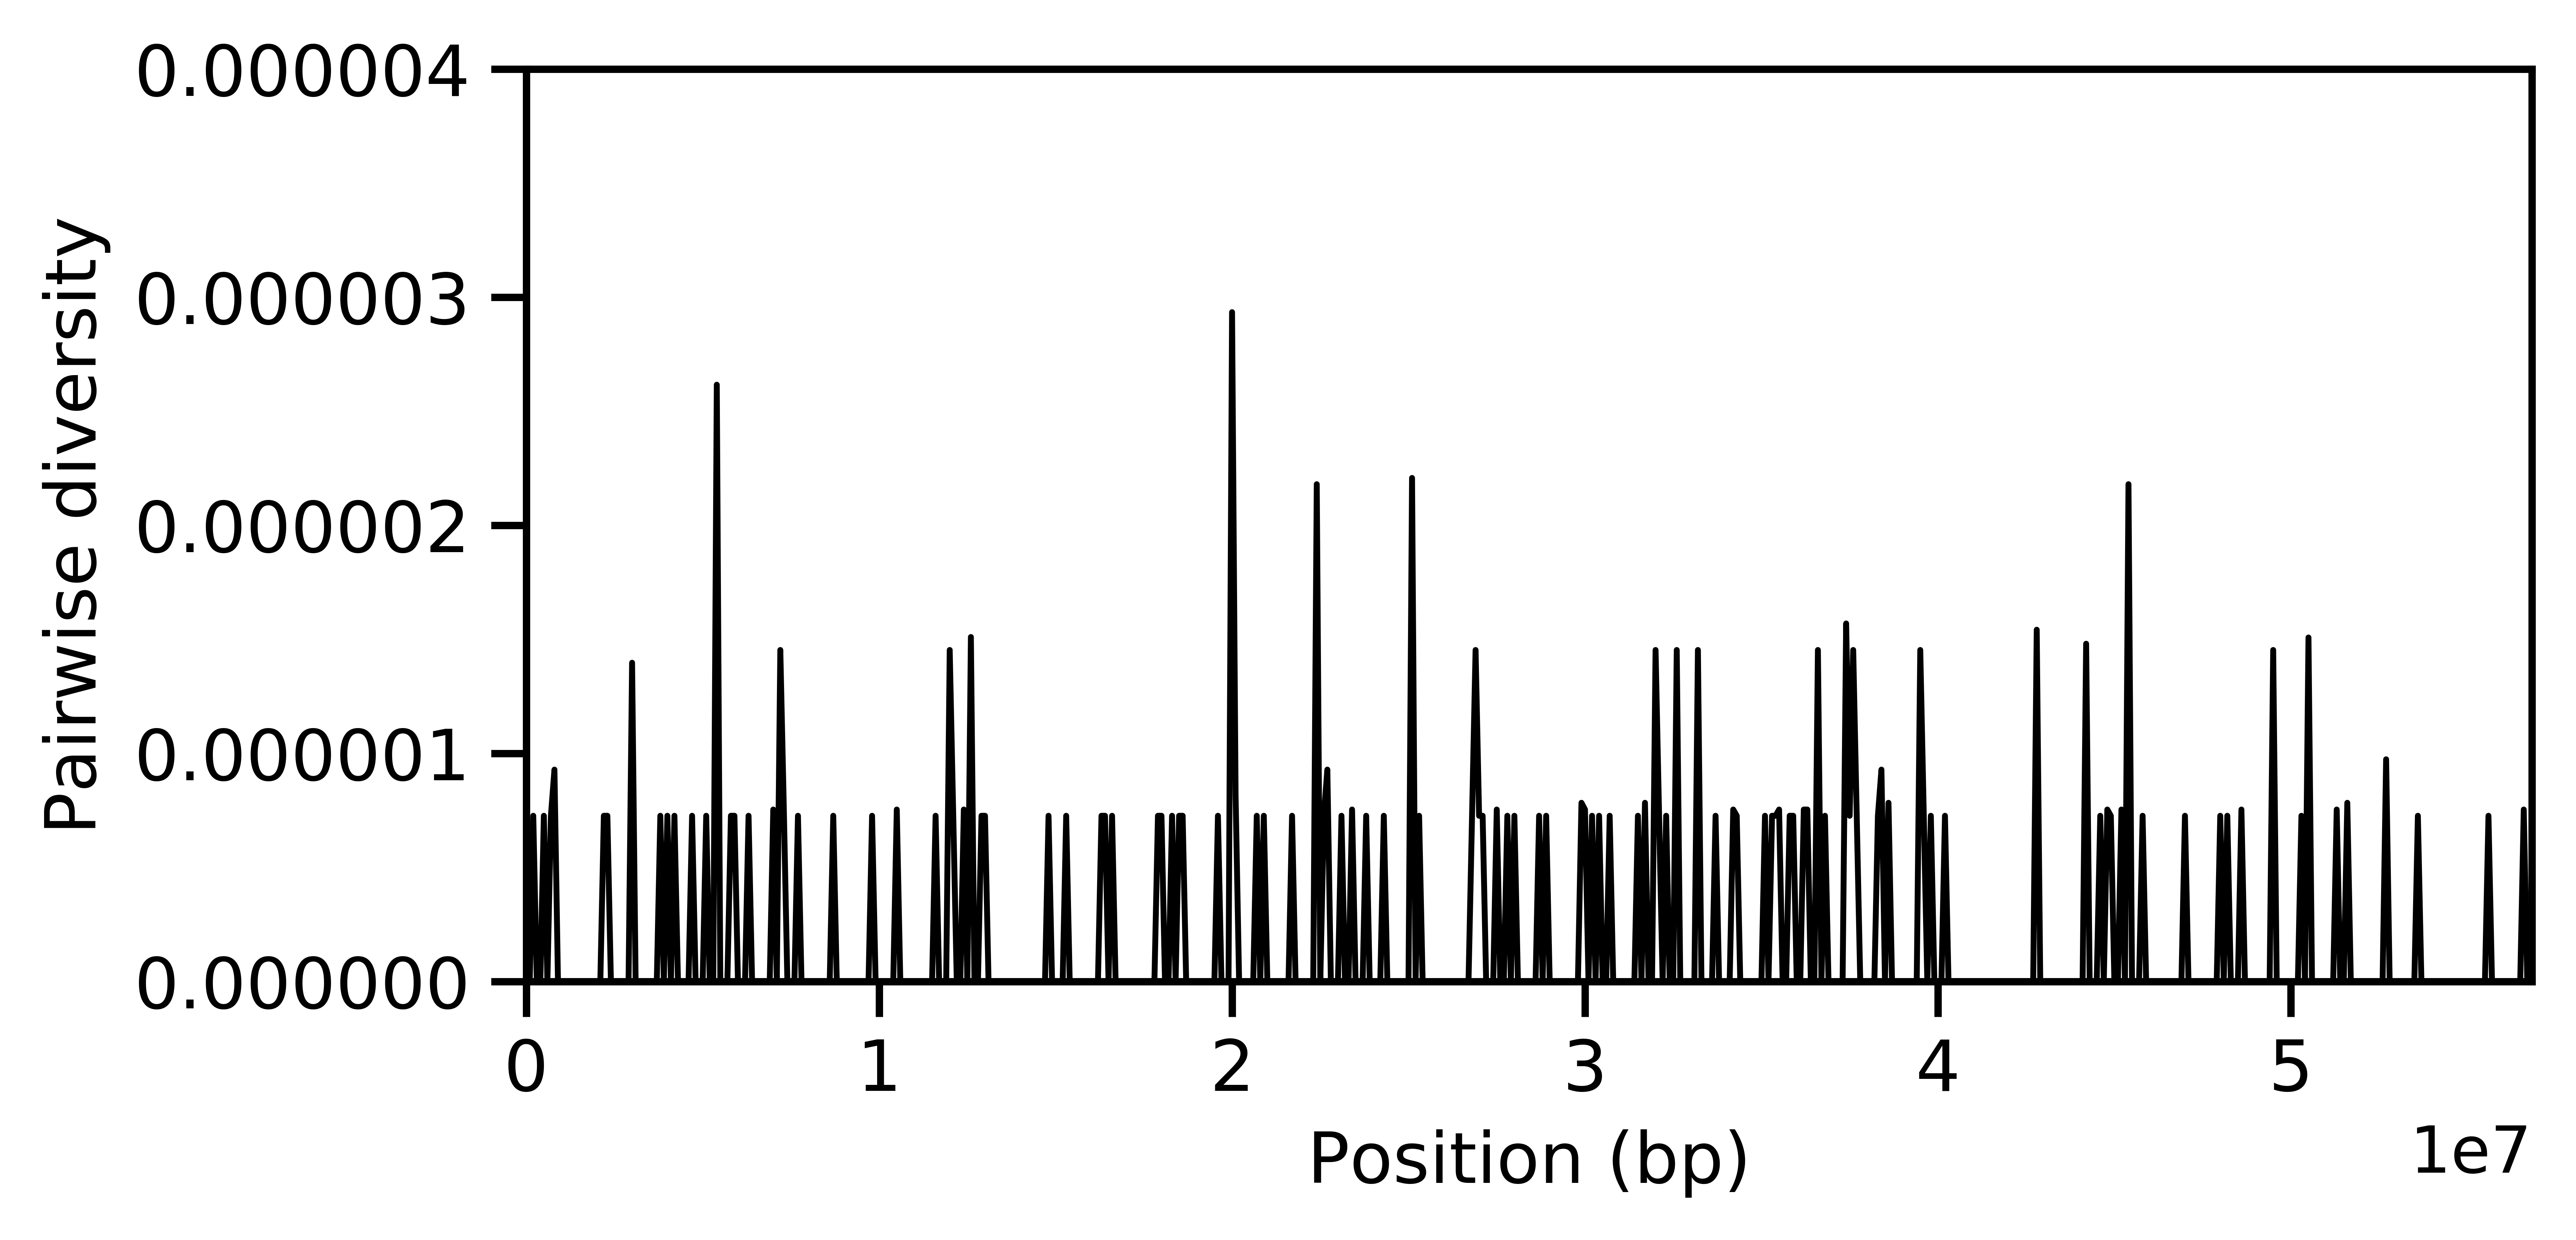

In [18]:
fig, ax = plt.subplots(figsize=(6.25, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.plot(window_pos, pi, color='black', linewidth='1')
plt.xlabel('Position (bp)')
plt.ylabel('Pairwise diversity')
plt.ylim(bottom=0)
plt.ylim(top=0.000004)
plt.xlim(left=0)
plt.xlim(right=int(chrom_lengths["Chr01"]))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('SupFigure3b.pdf')

In [11]:
callset = allel.read_vcf(baseline, region="Chr01")
g = allel.GenotypeArray(callset['calldata/GT'])
ac = g.count_alleles()
pos = callset['variants/POS']
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac, size=int(wsize), start=1, stop=int(chrom_lengths["Chr01"]))
window_pos = windows[:,0]

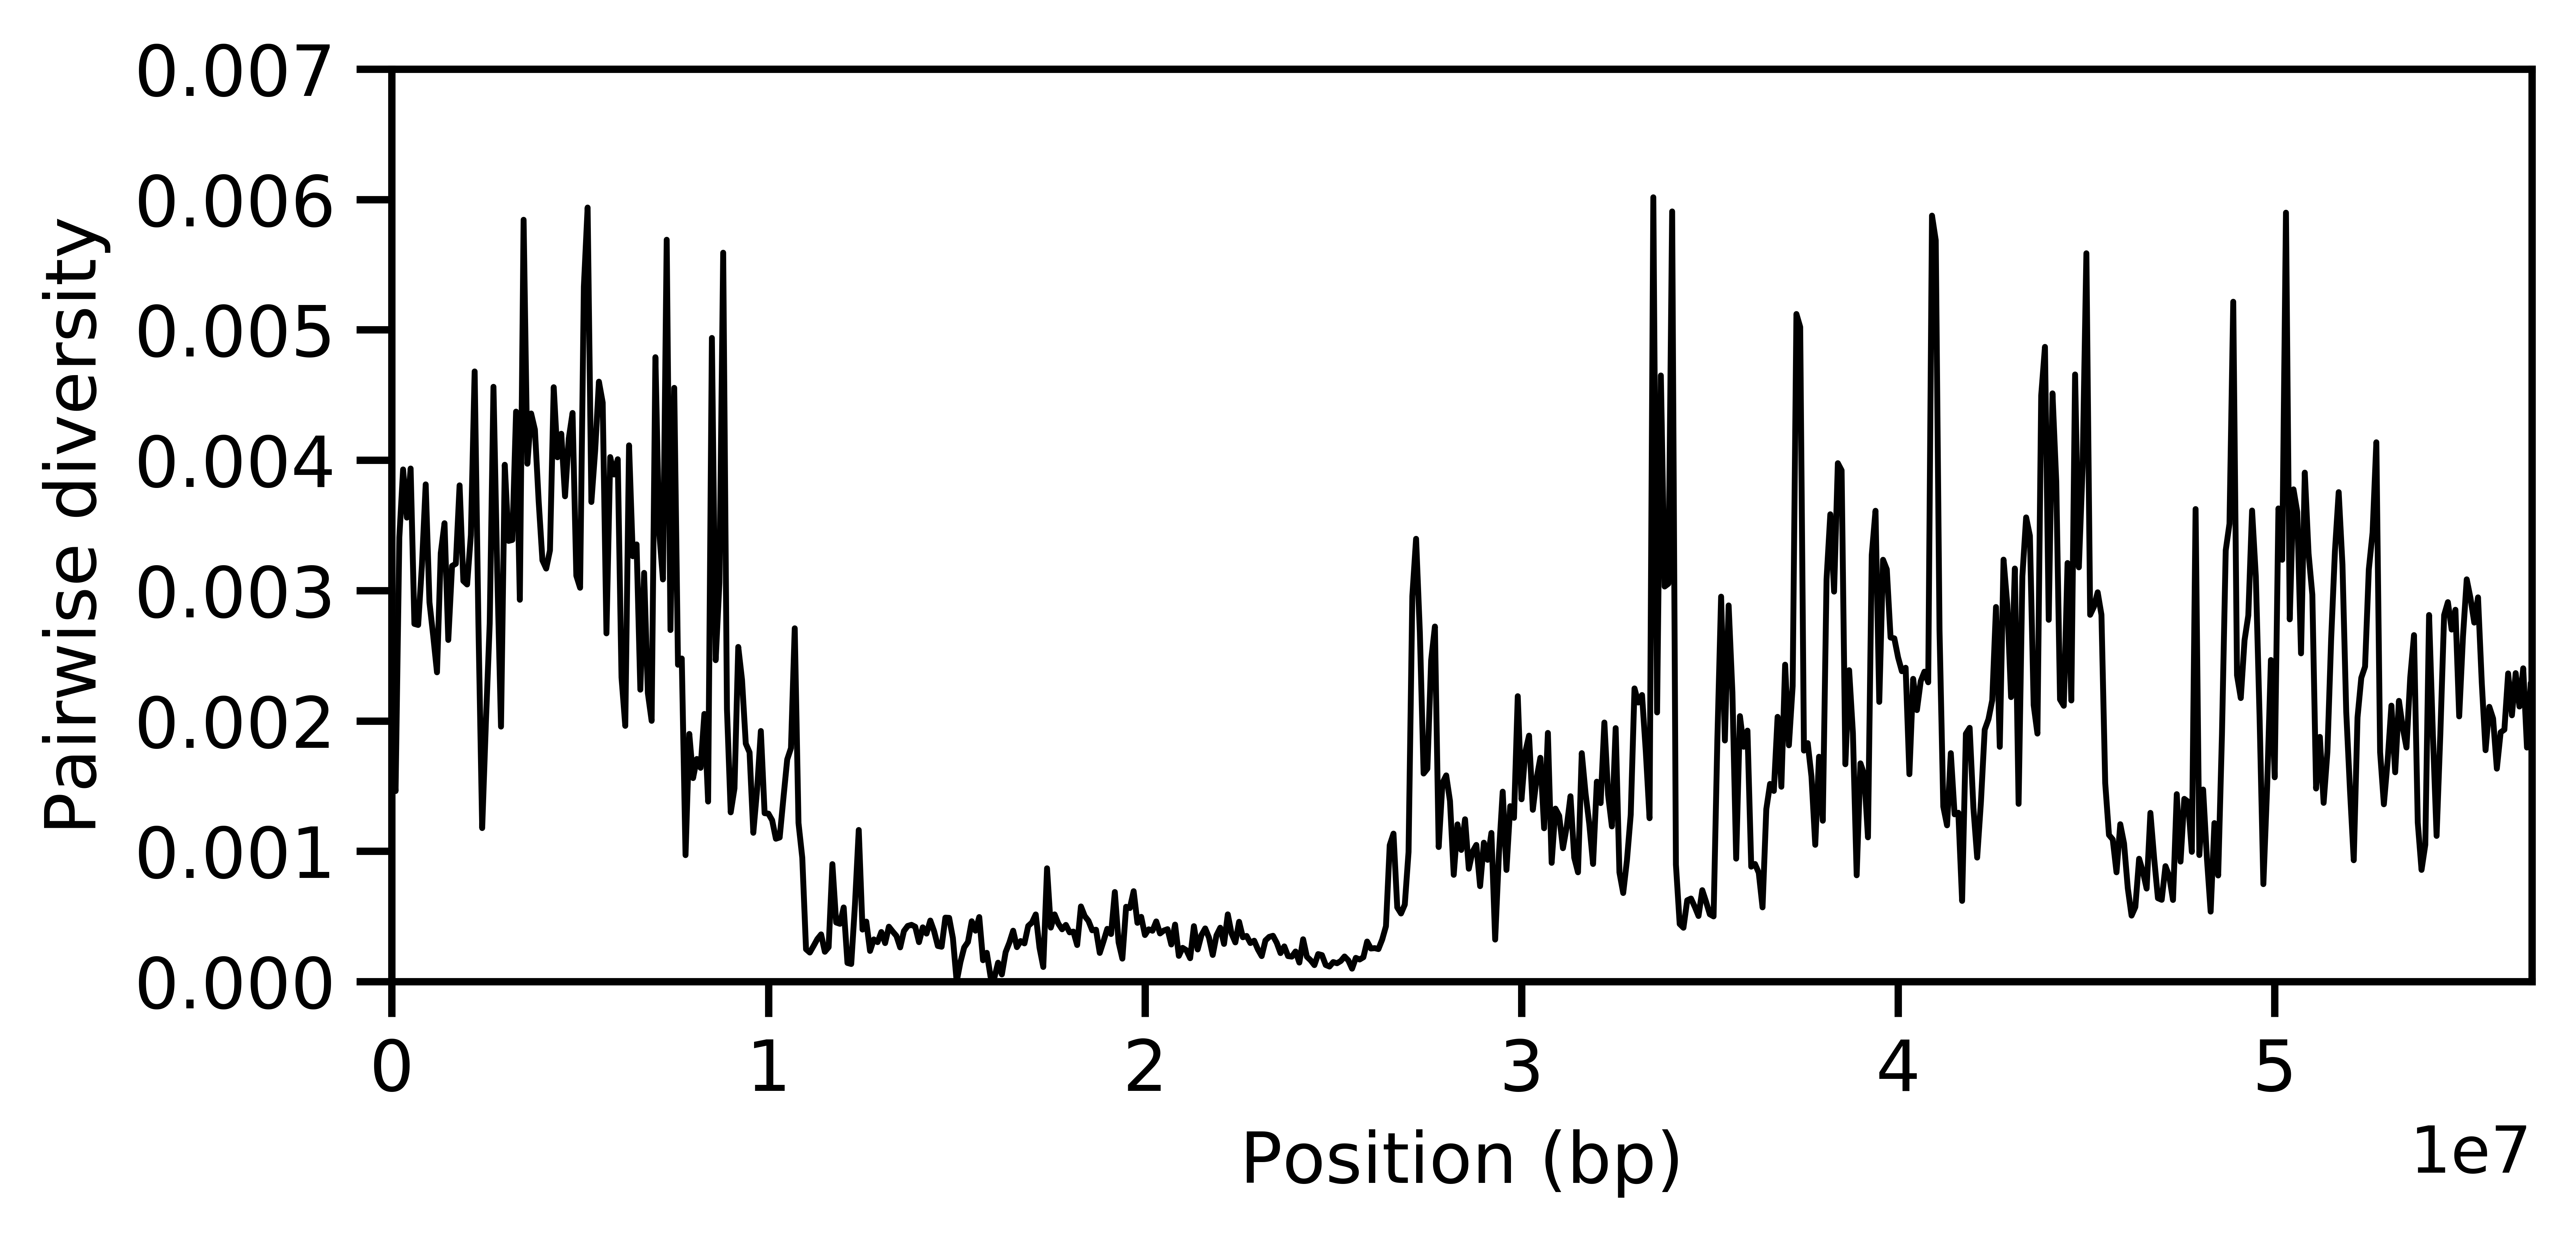

In [13]:
fig, ax = plt.subplots(figsize=(6.25, 3), dpi=1200, facecolor='w', edgecolor='black')
plt.plot(window_pos, pi, color='black', linewidth='1')
plt.xlabel('Position (bp)')
plt.ylabel('Pairwise diversity')
plt.ylim(bottom=0)
plt.ylim(top=0.007)
plt.xlim(left=0)
plt.xlim(right=int(chrom_lengths["Chr01"]))
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(12)
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.2)
plt.savefig('SupFigure3a.pdf')